In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px


In [3]:
data_2018 = pd.read_csv("20240313_11_Datensatz_Glueck_2018.csv")
data_2018

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [4]:
data_2019 = pd.read_csv("20240313_11_Datensatz_Glueck_2019.csv")
data_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [5]:
# Überprüfen der Datentypen der Spalten
print(data_2018.dtypes)

# Konvertierung aller Spalten in numerische Werte, wobei nicht-numerische Werte zu NaN (Not a Number) werden
data_2018_numeric = data_2018.apply(pd.to_numeric, errors='coerce')

# Überprüfen, ob fehlende Werte vorhanden sind und diese gegebenenfalls behandeln
print(data_2018_numeric.isnull().sum())

# Entfernen von Zeilen mit fehlenden Werten
data_2018_numeric = data_2018_numeric.dropna()

# Überprüfen der Datentypen nach der Konvertierung und Behandlung von fehlenden Werten
print(data_2018_numeric.dtypes)

# Korrelationsmatrix erstellen
corr_matrix = data_2018_numeric.corr()

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object
Overall rank                      0
Country or region               156
Score                             0
GDP per capita                    0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Generosity                        0
Perceptions of corruption         0
dtype: int64
Overall rank                      int64
Country or region               float64
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosit

In [6]:
top_3_gdp = data_2019.nlargest(3, "GDP per capita")
top_3_gdp

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
28,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.220,0.167
13,14,Luxembourg,7.090,1.609,1.479,1.012,0.526,0.194,0.316
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453


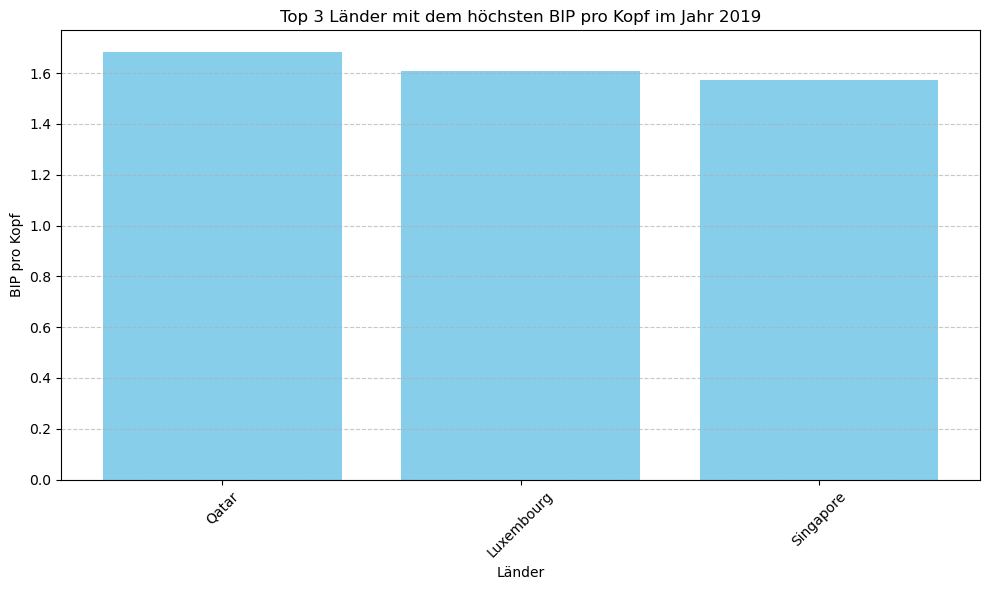

In [7]:
# Daten für die Top 3 Länder mit dem höchsten BIP pro Kopf auswählen
top_3_gdp = data_2019.nlargest(3, "GDP per capita")

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.bar(top_3_gdp["Country or region"], top_3_gdp["GDP per capita"], color='skyblue')
plt.xlabel('Länder')
plt.ylabel('BIP pro Kopf')
plt.title('Top 3 Länder mit dem höchsten BIP pro Kopf im Jahr 2019')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

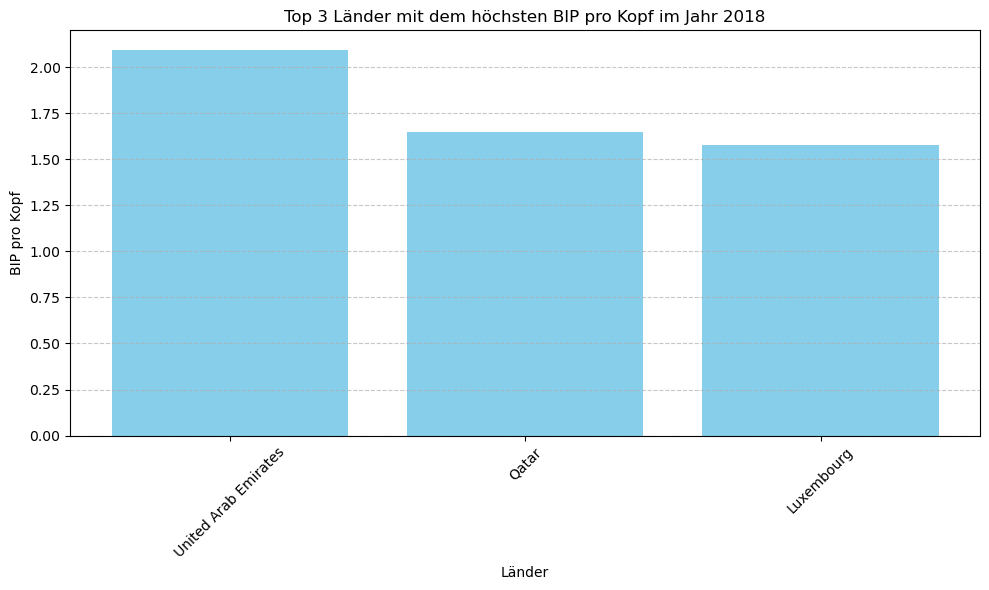

In [8]:
# Daten für die Top 3 Länder mit dem höchsten BIP pro Kopf auswählen
top_3_gdp = data_2018.nlargest(3, "GDP per capita")

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.bar(top_3_gdp["Country or region"], top_3_gdp["GDP per capita"], color='skyblue')
plt.xlabel('Länder')
plt.ylabel('BIP pro Kopf')
plt.title('Top 3 Länder mit dem höchsten BIP pro Kopf im Jahr 2018')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

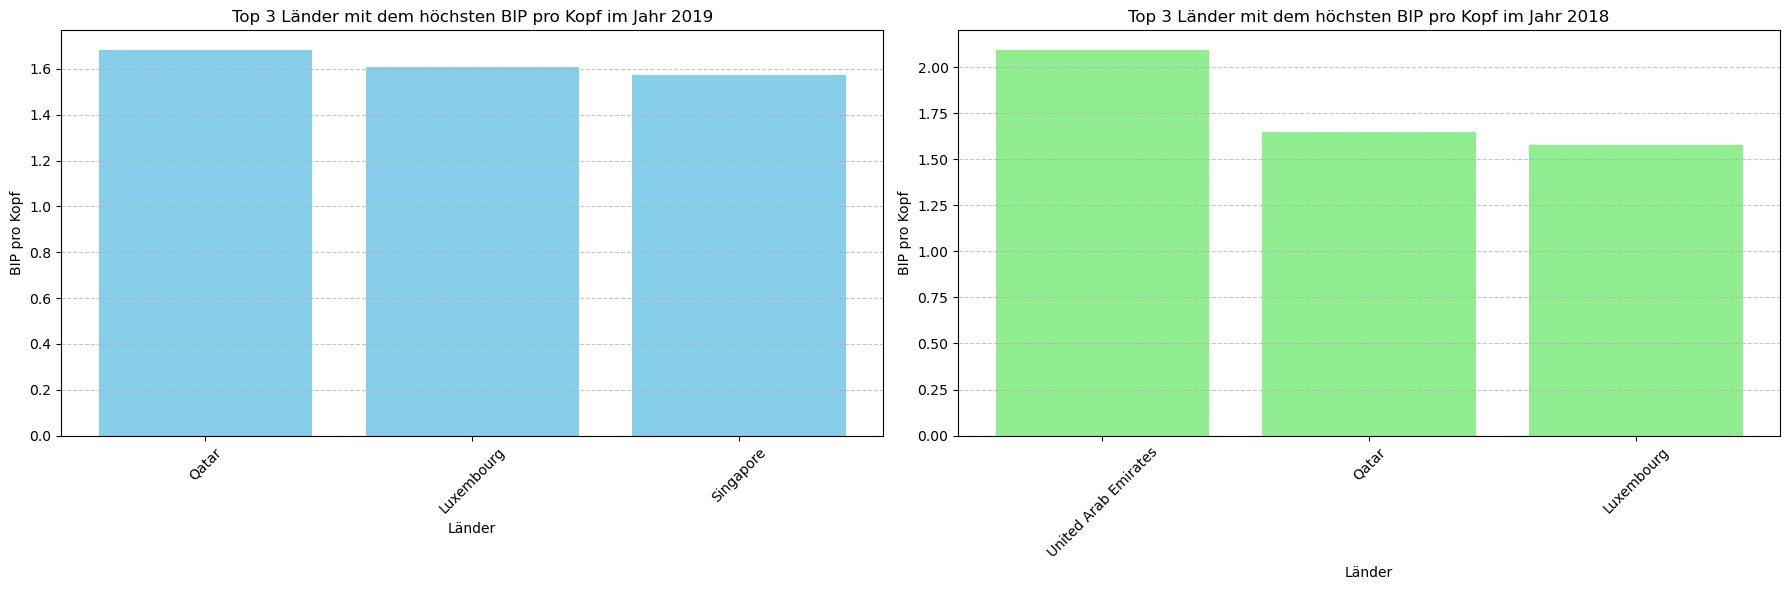

In [9]:
# Daten für die Top 3 Länder mit dem höchsten BIP pro Kopf im Jahr 2019 auswählen
top_3_gdp_2019 = data_2019.nlargest(3, "GDP per capita")

# Daten für die Top 3 Länder mit dem höchsten BIP pro Kopf im Jahr 2018 auswählen
top_3_gdp_2018 = data_2018.nlargest(3, "GDP per capita")


# Plot erstellen
plt.figure(figsize=(18, 6))

# Plot für das Jahr 2019
plt.subplot(1, 2, 1)
plt.bar(top_3_gdp_2019["Country or region"], top_3_gdp_2019["GDP per capita"], color='skyblue')
plt.xlabel('Länder')
plt.ylabel('BIP pro Kopf')
plt.title('Top 3 Länder mit dem höchsten BIP pro Kopf im Jahr 2019')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot für das Jahr 2018
plt.subplot(1, 2, 2)
plt.bar(top_3_gdp_2018["Country or region"], top_3_gdp_2018["GDP per capita"], color='lightgreen')
plt.xlabel('Länder')
plt.ylabel('BIP pro Kopf')
plt.title('Top 3 Länder mit dem höchsten BIP pro Kopf im Jahr 2018')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

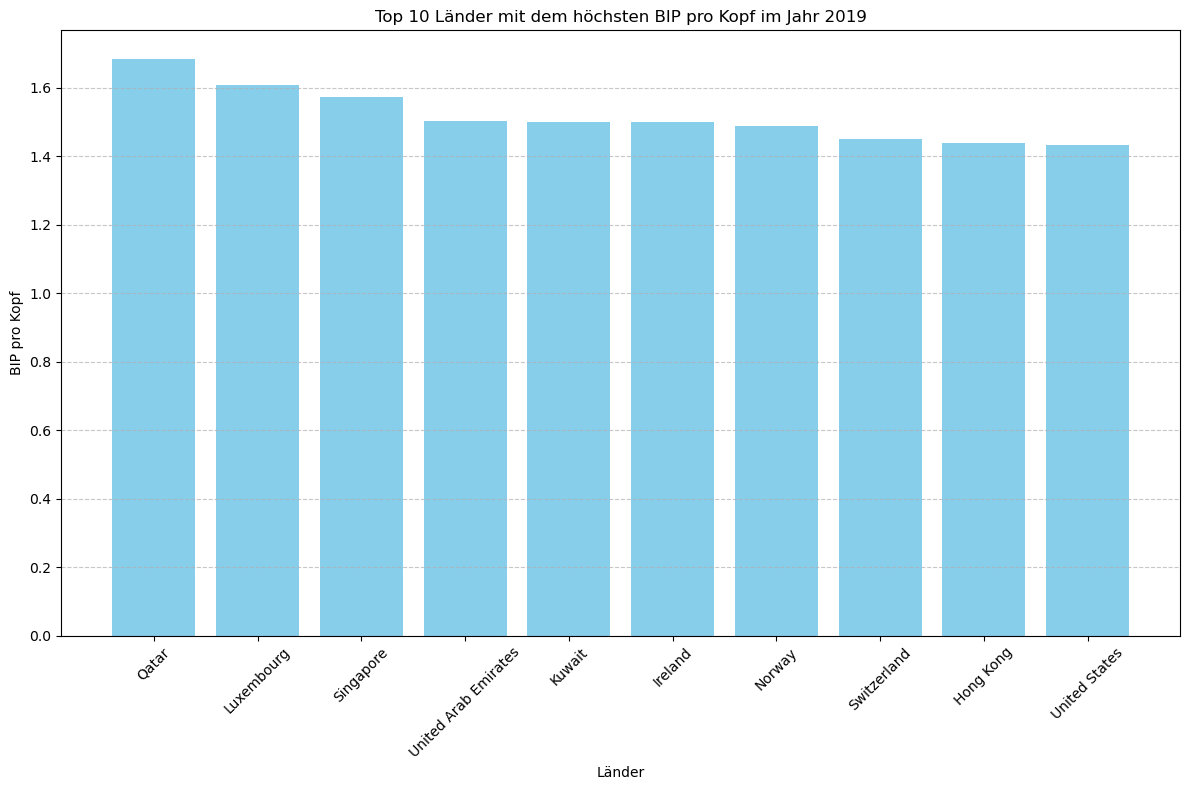

In [10]:
# Daten für die Top 10 Länder mit dem höchsten BIP pro Kopf auswählen
top_10_gdp = data_2019.nlargest(10, "GDP per capita")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(top_10_gdp["Country or region"], top_10_gdp["GDP per capita"], color='skyblue')
plt.xlabel('Länder')
plt.ylabel('BIP pro Kopf')
plt.title('Top 10 Länder mit dem höchsten BIP pro Kopf im Jahr 2019')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

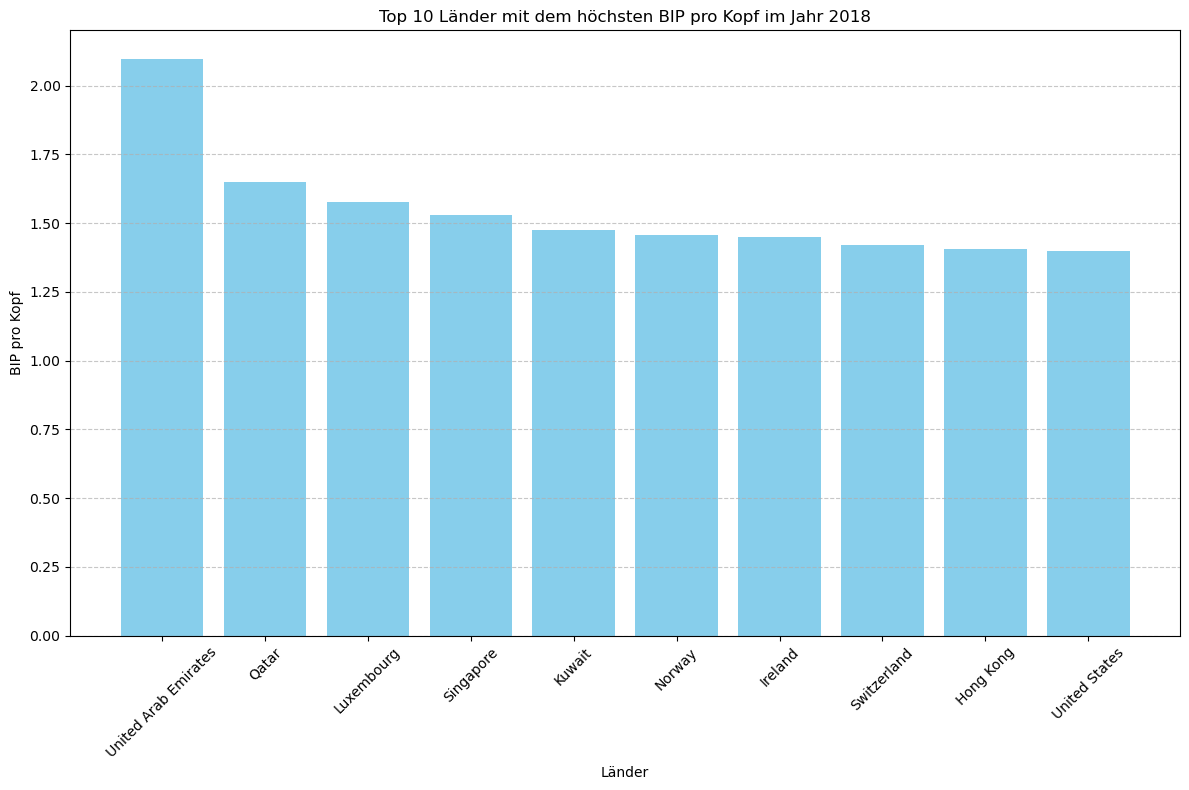

In [11]:
# Daten für die Top 10 Länder mit dem höchsten BIP pro Kopf auswählen
top_10_gdp = data_2018.nlargest(10, "GDP per capita")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(top_10_gdp["Country or region"], top_10_gdp["GDP per capita"], color='skyblue')
plt.xlabel('Länder')
plt.ylabel('BIP pro Kopf')
plt.title('Top 10 Länder mit dem höchsten BIP pro Kopf im Jahr 2018')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

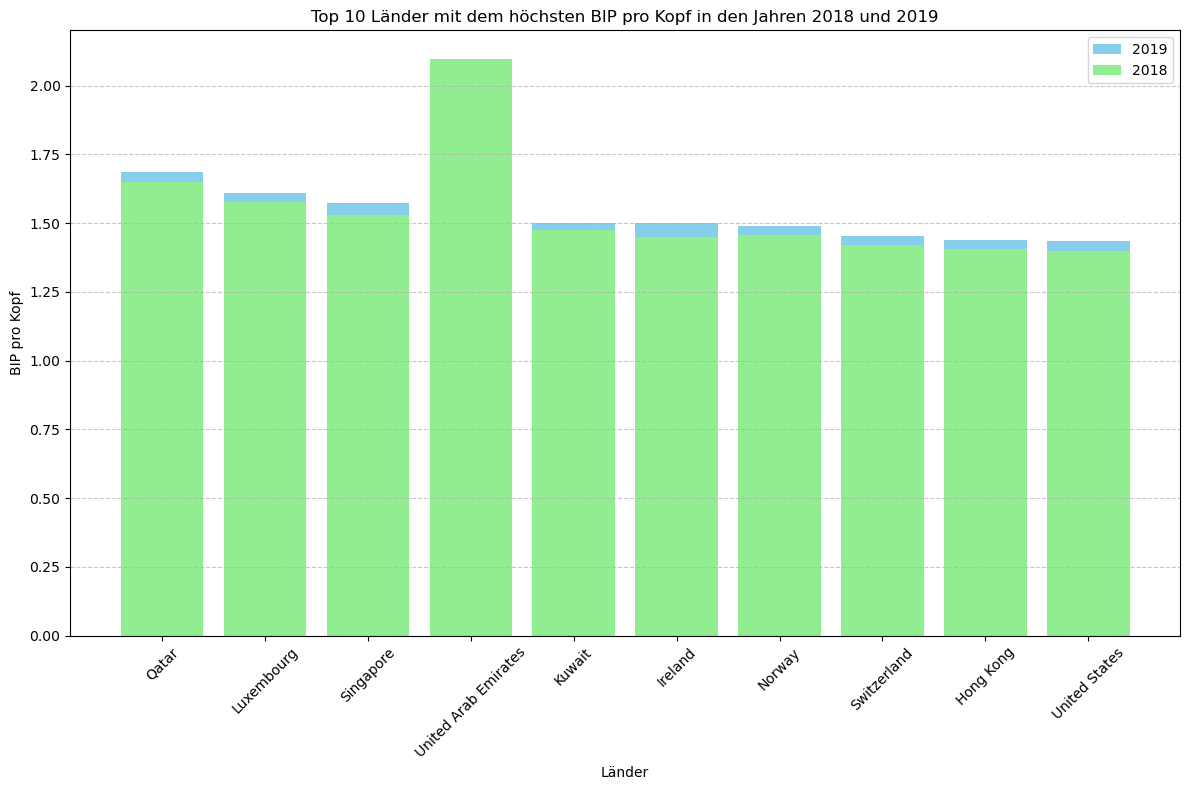

In [12]:
# Daten für die Top 10 Länder mit dem höchsten BIP pro Kopf im Jahr 2019 auswählen
top_10_gdp_2019 = data_2019.nlargest(10, "GDP per capita")

# Daten für die Top 10 Länder mit dem höchsten BIP pro Kopf im Jahr 2018 auswählen
top_10_gdp_2018 = data_2018.nlargest(10, "GDP per capita")

# Plot erstellen
plt.figure(figsize=(12, 8))

# Plot für das Jahr 2019
plt.bar(top_10_gdp_2019["Country or region"], top_10_gdp_2019["GDP per capita"], color='skyblue', label='2019')

# Plot für das Jahr 2018
plt.bar(top_10_gdp_2018["Country or region"], top_10_gdp_2018["GDP per capita"], color='lightgreen', label='2018')

plt.xlabel('Länder')
plt.ylabel('BIP pro Kopf')
plt.title('Top 10 Länder mit dem höchsten BIP pro Kopf in den Jahren 2018 und 2019')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


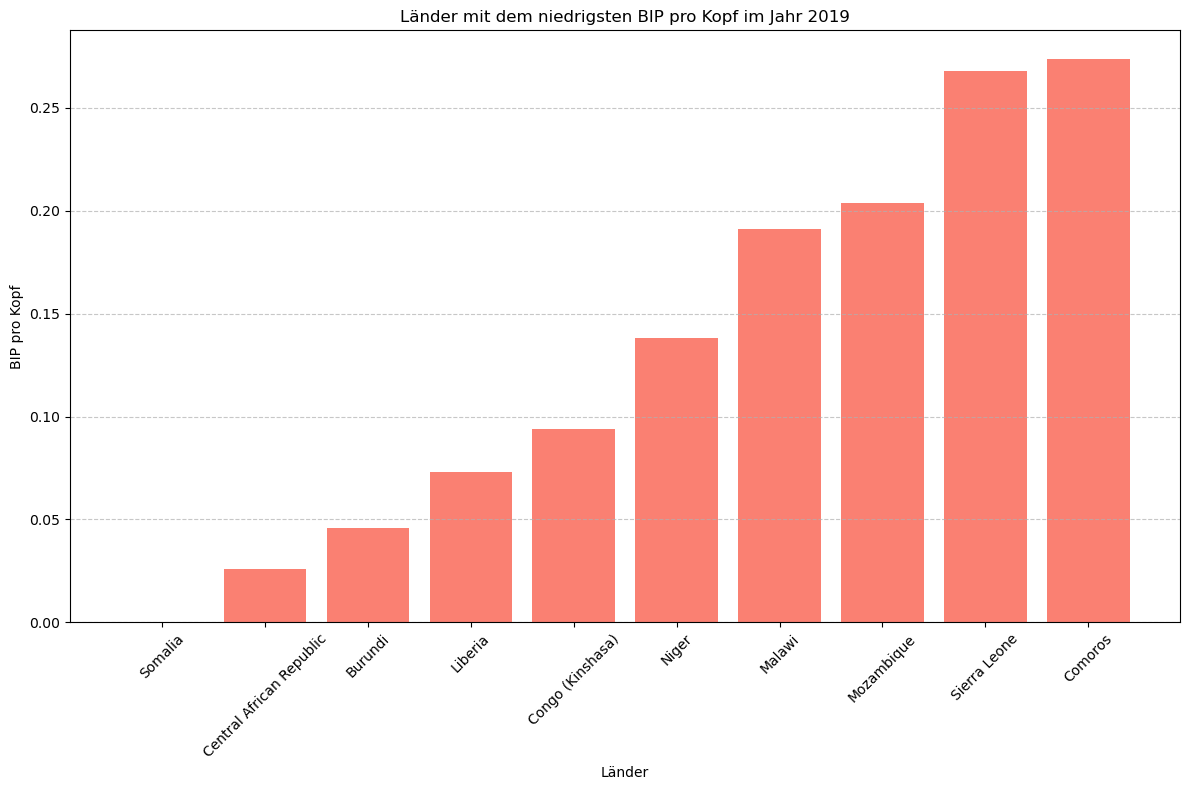

In [13]:
# Daten für die 10 Länder mit dem niedrigsten BIP pro Kopf auswählen
bottom_10_gdp = data_2019.nsmallest(10, "GDP per capita")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(bottom_10_gdp["Country or region"], bottom_10_gdp["GDP per capita"], color='salmon')
plt.xlabel('Länder')
plt.ylabel('BIP pro Kopf')
plt.title('Länder mit dem niedrigsten BIP pro Kopf im Jahr 2019')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

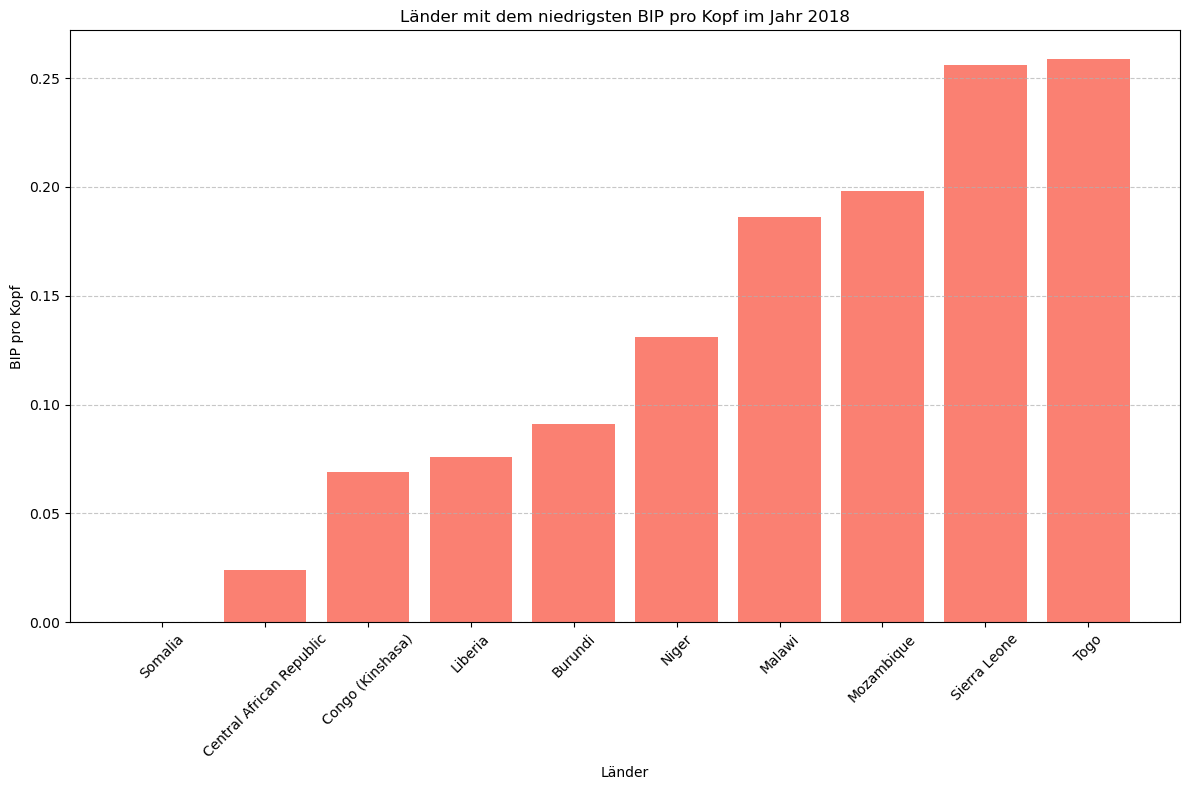

In [14]:
# Daten für die 10 Länder mit dem niedrigsten BIP pro Kopf auswählen
bottom_10_gdp = data_2018.nsmallest(10, "GDP per capita")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(bottom_10_gdp["Country or region"], bottom_10_gdp["GDP per capita"], color='salmon')
plt.xlabel('Länder')
plt.ylabel('BIP pro Kopf')
plt.title('Länder mit dem niedrigsten BIP pro Kopf im Jahr 2018')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

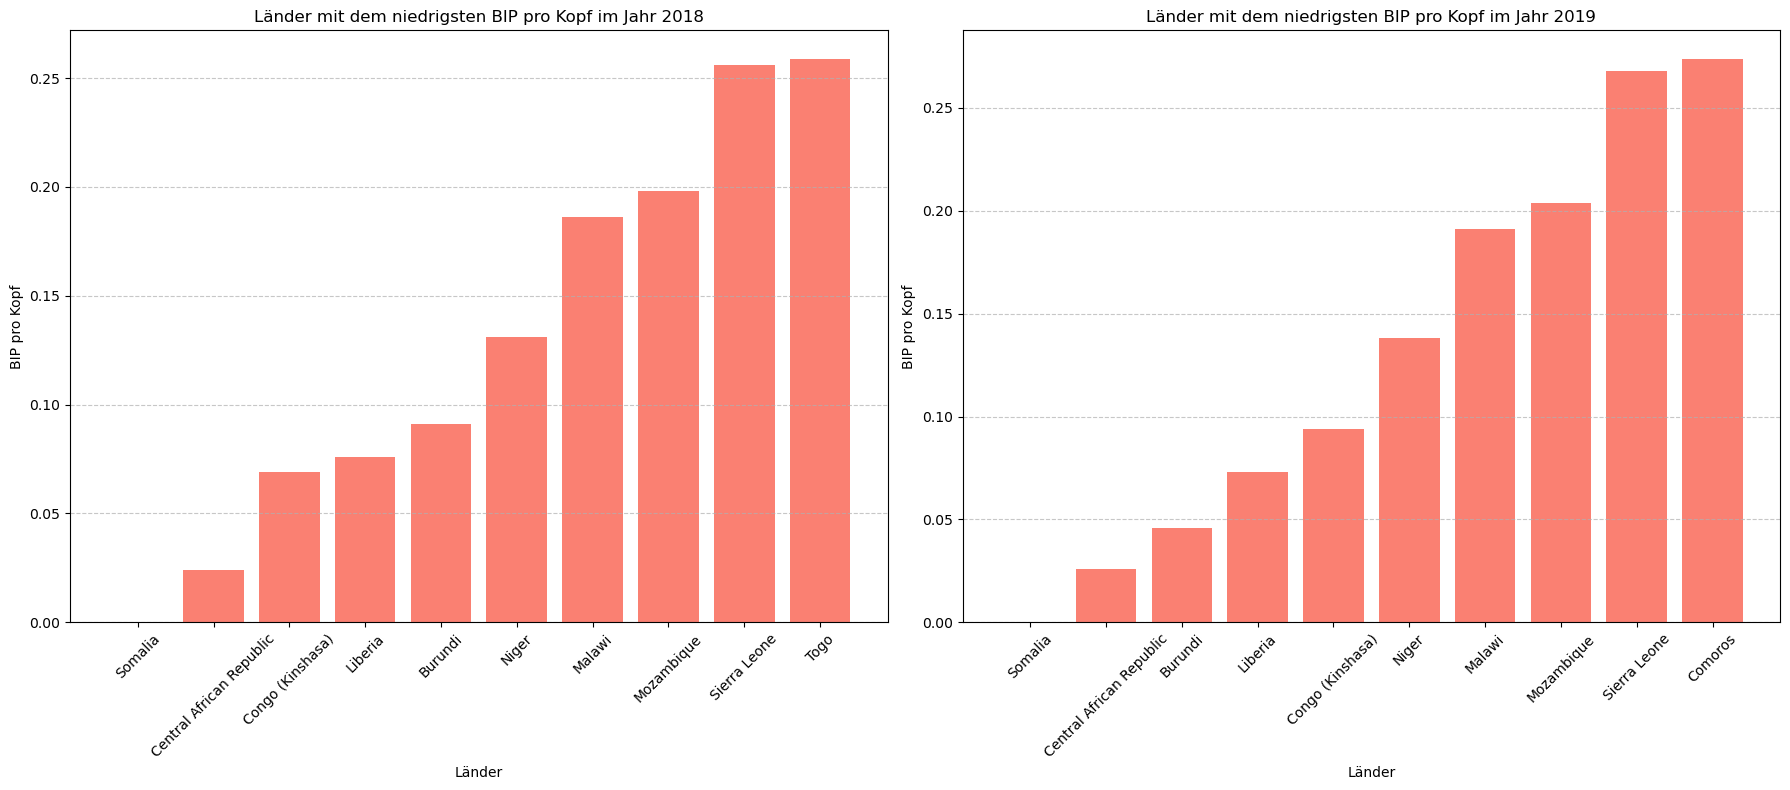

In [15]:
# Daten für die 10 Länder mit dem niedrigsten BIP pro Kopf auswählen
bottom_10_gdp_2018 = data_2018.nsmallest(10, "GDP per capita")
bottom_10_gdp_2019 = data_2019.nsmallest(10, "GDP per capita")

# Erstellen der Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot für 2018 erstellen
axes[0].bar(bottom_10_gdp_2018["Country or region"], bottom_10_gdp_2018["GDP per capita"], color='salmon')
axes[0].set_xlabel('Länder')
axes[0].set_ylabel('BIP pro Kopf')
axes[0].set_title('Länder mit dem niedrigsten BIP pro Kopf im Jahr 2018')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot für 2019 erstellen
axes[1].bar(bottom_10_gdp_2019["Country or region"], bottom_10_gdp_2019["GDP per capita"], color='salmon')
axes[1].set_xlabel('Länder')
axes[1].set_ylabel('BIP pro Kopf')
axes[1].set_title('Länder mit dem niedrigsten BIP pro Kopf im Jahr 2019')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

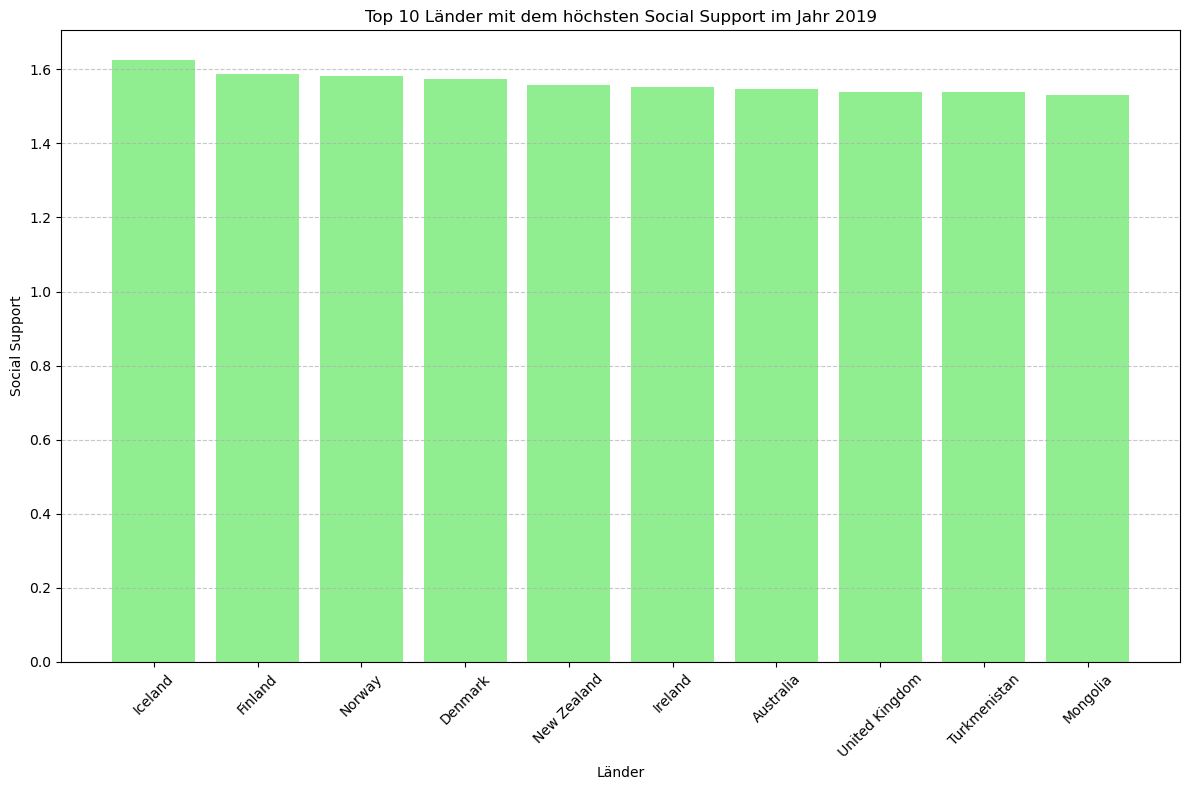

In [16]:
# Daten für die Top 10 Länder mit dem höchsten Social Support auswählen
top_10_social_support = data_2019.nlargest(10, "Social support")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(top_10_social_support["Country or region"], top_10_social_support["Social support"], color='lightgreen')
plt.xlabel('Länder')
plt.ylabel('Social Support')
plt.title('Top 10 Länder mit dem höchsten Social Support im Jahr 2019')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

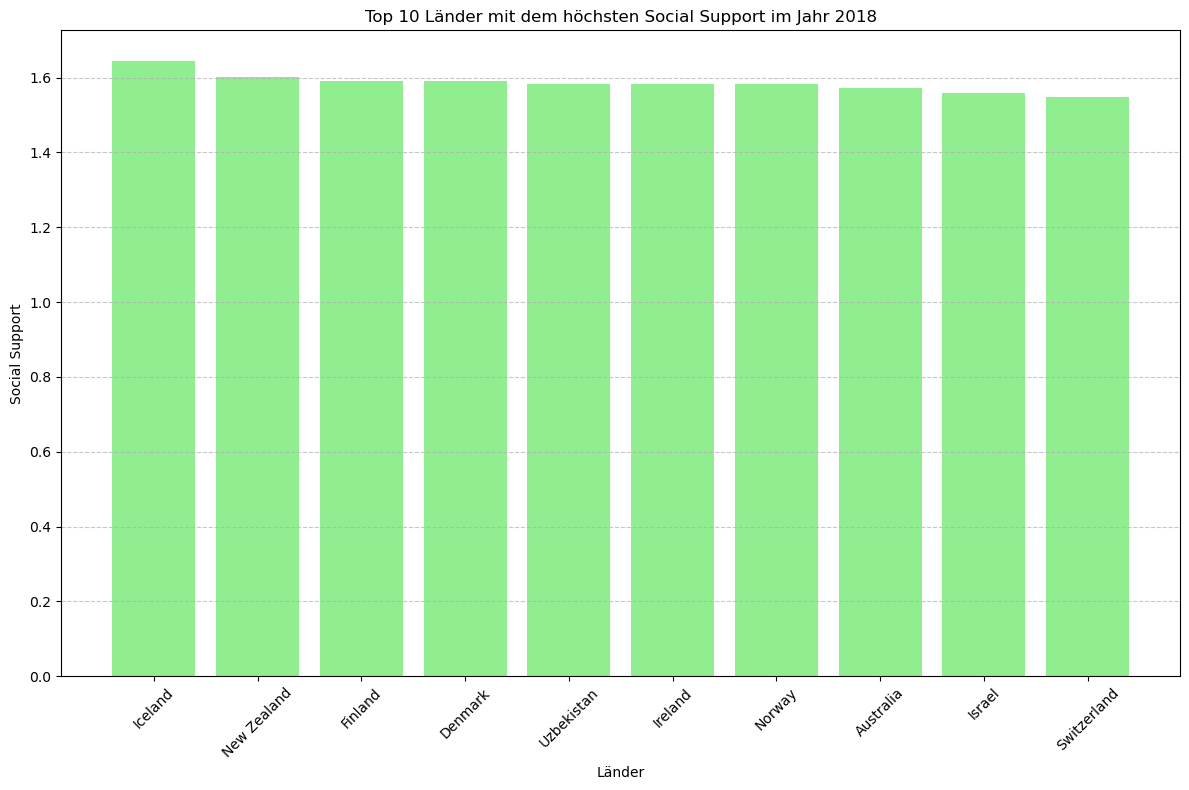

In [17]:
# Daten für die Top 10 Länder mit dem höchsten Social Support auswählen
top_10_social_support = data_2018.nlargest(10, "Social support")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(top_10_social_support["Country or region"], top_10_social_support["Social support"], color='lightgreen')
plt.xlabel('Länder')
plt.ylabel('Social Support')
plt.title('Top 10 Länder mit dem höchsten Social Support im Jahr 2018')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

SyntaxError: keyword argument repeated: color (3655350647.py, line 17)

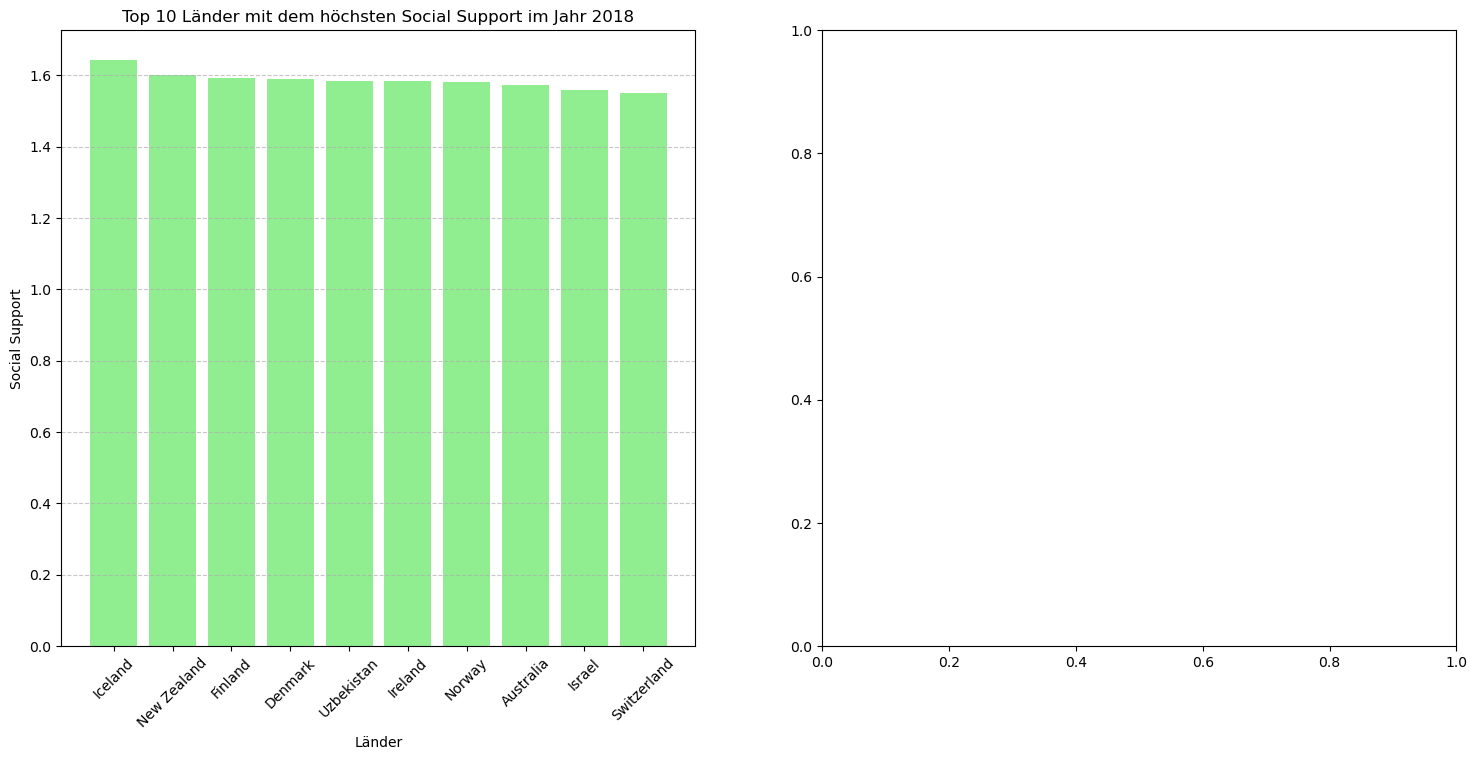

In [18]:
# Daten für die Top 10 Länder mit dem höchsten Social Support im Jahr 2018 und 2019 auswählen
top_10_social_support_2018 = data_2018.nlargest(10, "Social support")
top_10_social_support_2019 = data_2019.nlargest(10, "Social support")

# Erstellen der Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot für 2018 erstellen
axes[0].bar(top_10_social_support_2018["Country or region"], top_10_social_support_2018["Social support"], color='lightgreen')
axes[0].set_xlabel('Länder')
axes[0].set_ylabel('Social Support')
axes[0].set_title('Top 10 Länder mit dem höchsten Social Support im Jahr 2018')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot für 2019 erstellen
axes[1].bar(top_10_social_support_2019["Country or region"], top_10_social_support_2019["Social support"], color='lightgreen',color='skyblue')
axes[1].set_xlabel('Länder')
axes[1].set_ylabel('Social Support')
axes[1].set_title('Top 10 Länder mit dem höchsten Social Support im Jahr 2019')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

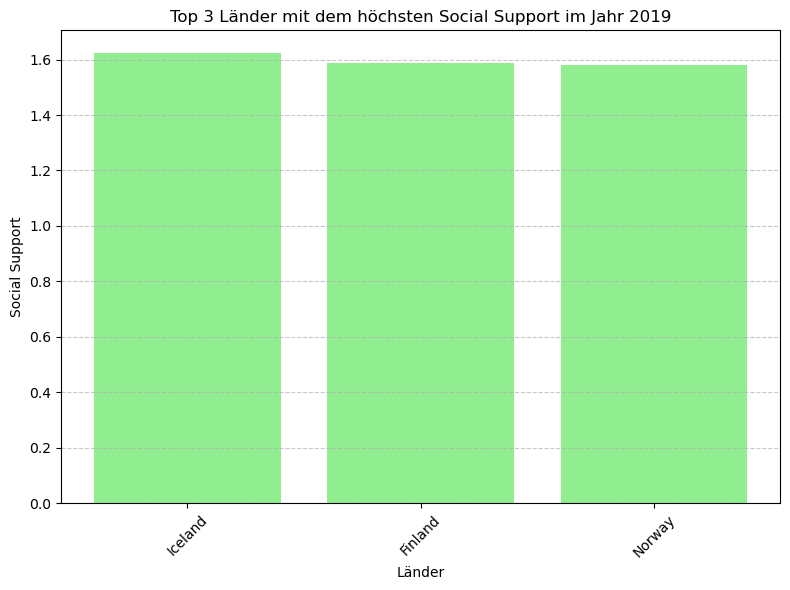

In [ ]:
# Daten für die Top 3 Länder mit dem höchsten Social Support auswählen
top_3_social_support = data_2019.nlargest(3, "Social support")

# Plot erstellen
plt.figure(figsize=(8, 6))
plt.bar(top_3_social_support["Country or region"], top_3_social_support["Social support"], color='lightgreen')
plt.xlabel('Länder')
plt.ylabel('Social Support')
plt.title('Top 3 Länder mit dem höchsten Social Support im Jahr 2019')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

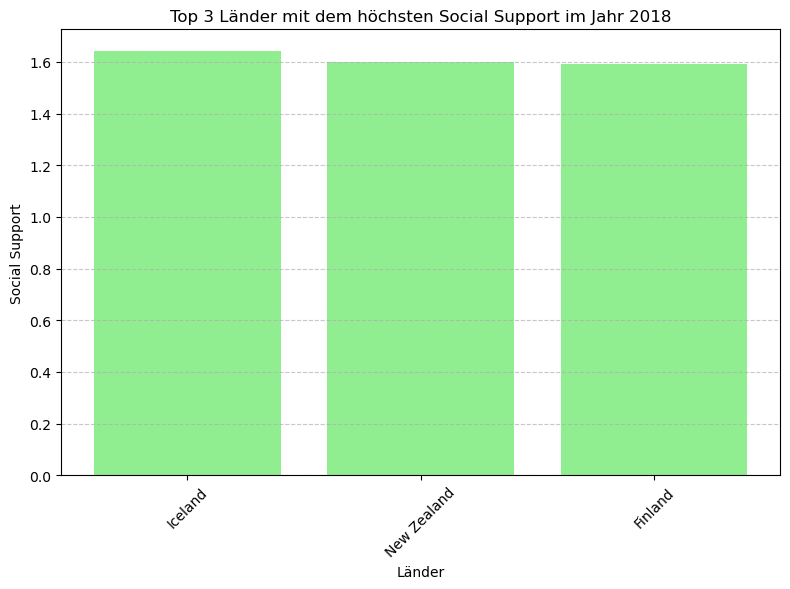

In [ ]:
# Daten für die Top 3 Länder mit dem höchsten Social Support auswählen
top_3_social_support = data_2018.nlargest(3, "Social support")

# Plot erstellen
plt.figure(figsize=(8, 6))
plt.bar(top_3_social_support["Country or region"], top_3_social_support["Social support"], color='lightgreen')
plt.xlabel('Länder')
plt.ylabel('Social Support')
plt.title('Top 3 Länder mit dem höchsten Social Support im Jahr 2018')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

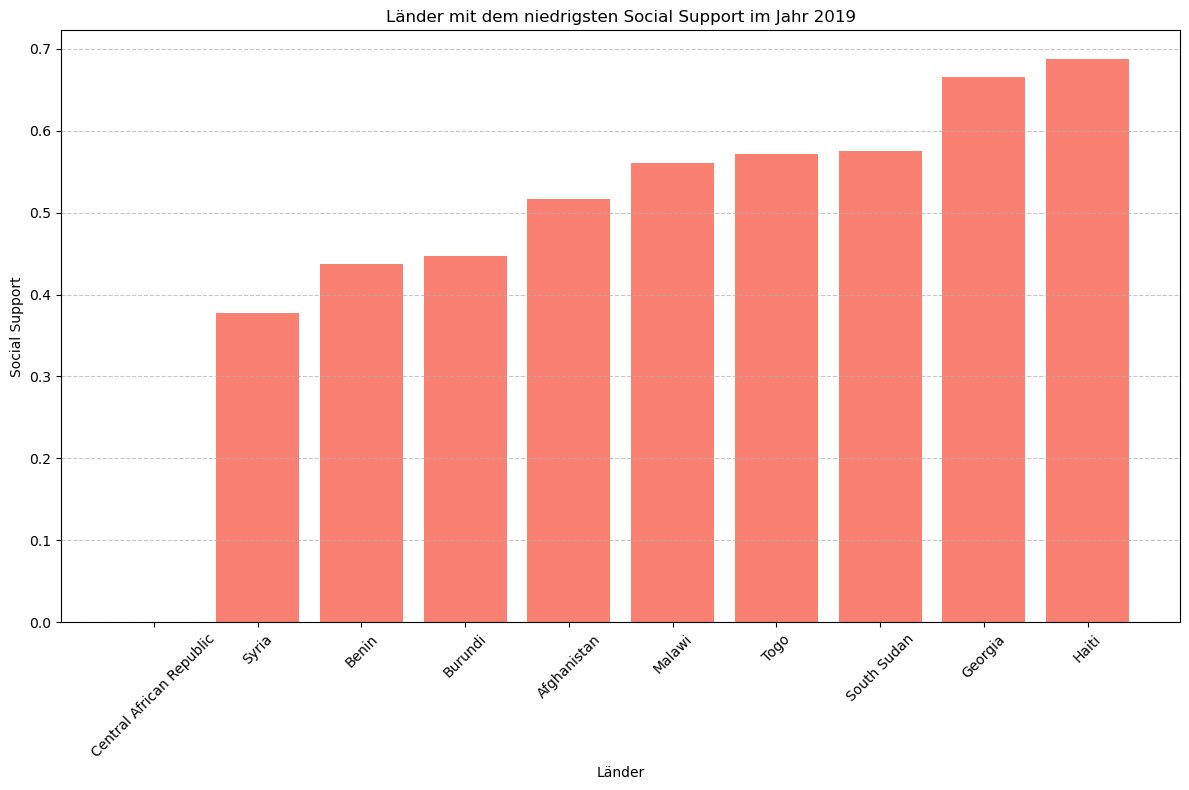

In [ ]:
# Daten für die 10 Länder mit dem niedrigsten Social Support auswählen
bottom_10_social_support = data_2019.nsmallest(10, "Social support")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(bottom_10_social_support["Country or region"], bottom_10_social_support["Social support"], color='salmon')
plt.xlabel('Länder')
plt.ylabel('Social Support')
plt.title('Länder mit dem niedrigsten Social Support im Jahr 2019')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

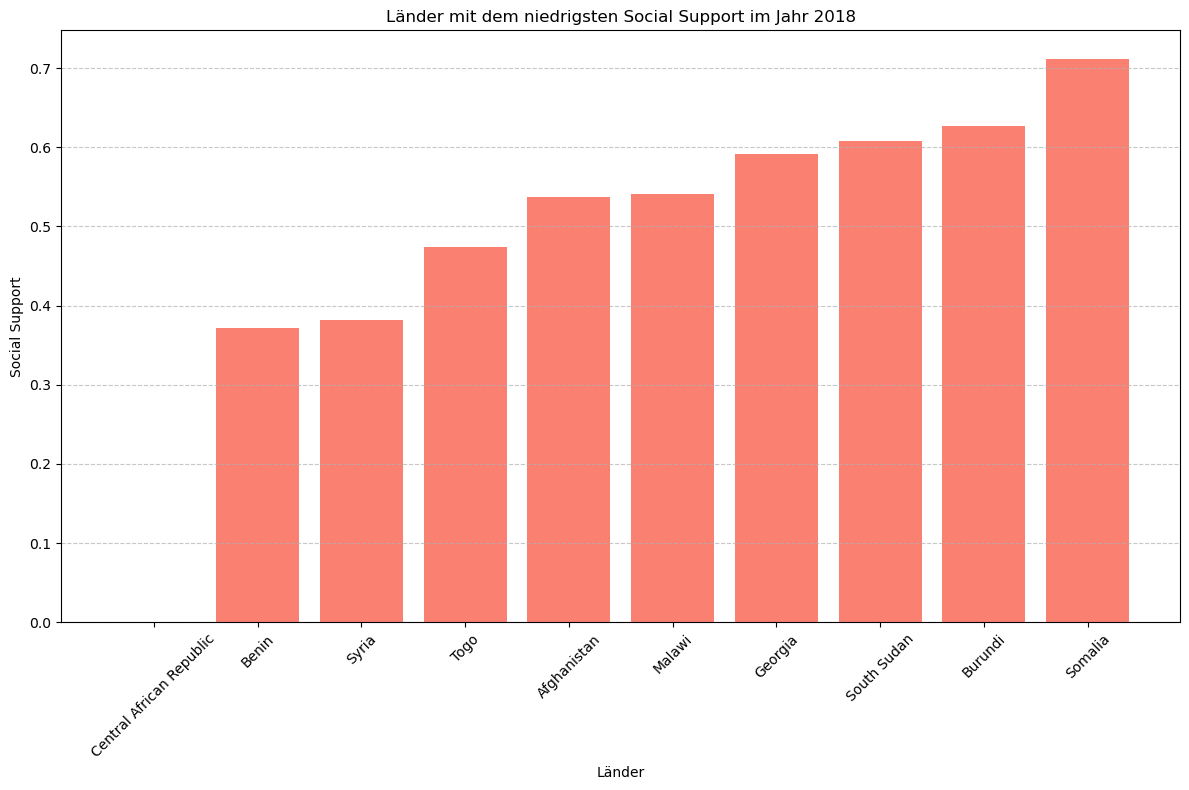

In [ ]:
# Daten für die 10 Länder mit dem niedrigsten Social Support auswählen
bottom_10_social_support = data_2018.nsmallest(10, "Social support")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(bottom_10_social_support["Country or region"], bottom_10_social_support["Social support"], color='salmon')
plt.xlabel('Länder')
plt.ylabel('Social Support')
plt.title('Länder mit dem niedrigsten Social Support im Jahr 2018')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

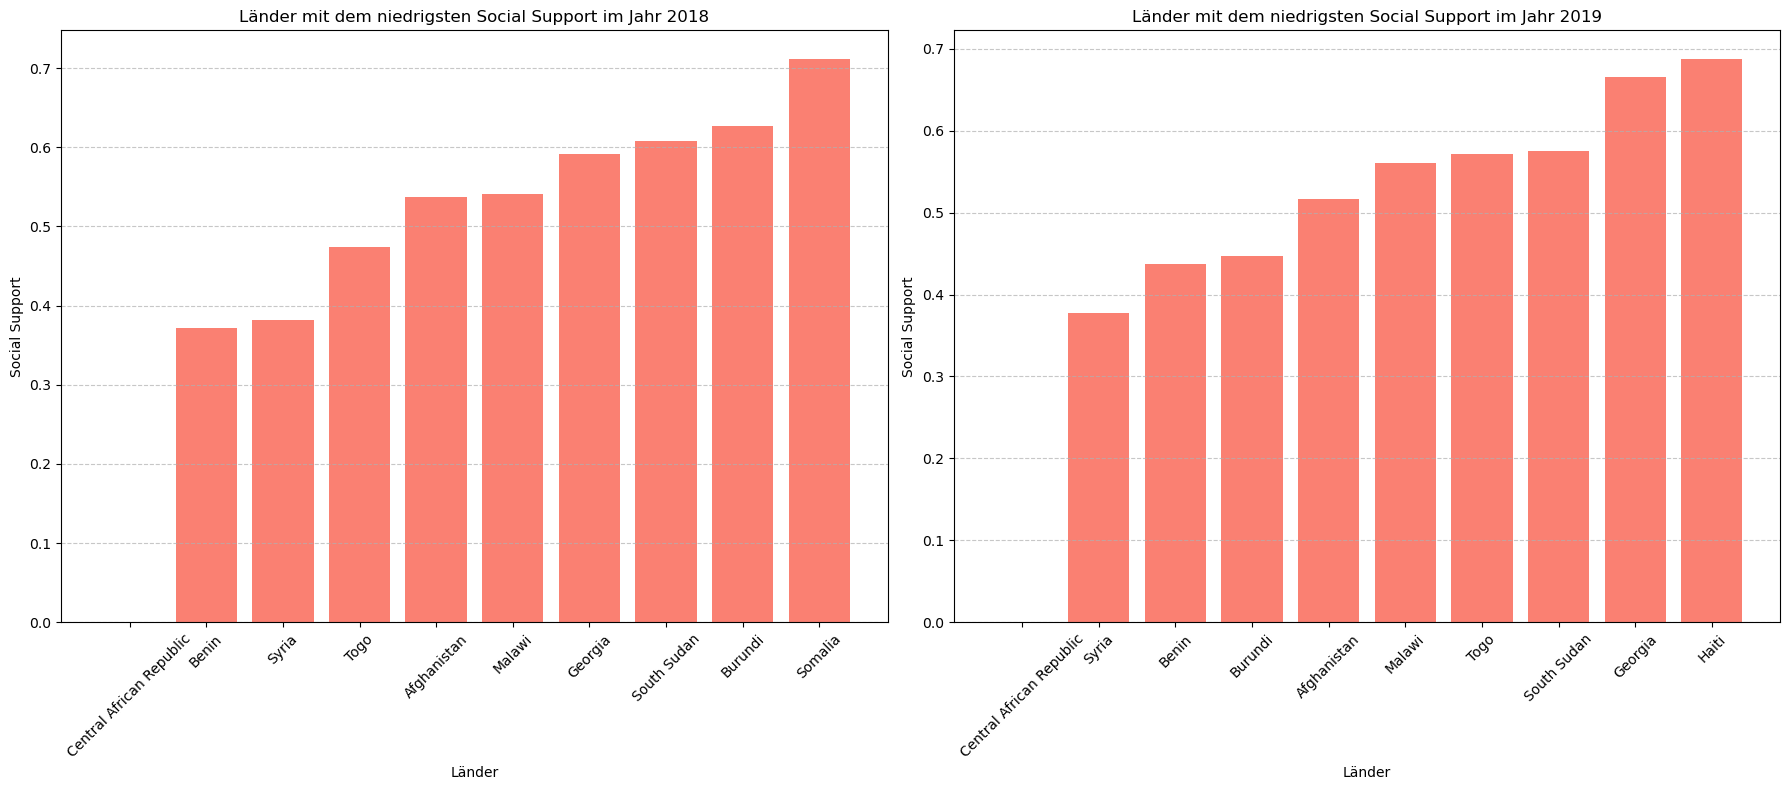

In [ ]:
# Daten für die 10 Länder mit dem niedrigsten Social Support im Jahr 2018 und 2019 auswählen
bottom_10_social_support_2018 = data_2018.nsmallest(10, "Social support")
bottom_10_social_support_2019 = data_2019.nsmallest(10, "Social support")

# Erstellen der Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot für 2018 erstellen
axes[0].bar(bottom_10_social_support_2018["Country or region"], bottom_10_social_support_2018["Social support"], color='salmon')
axes[0].set_xlabel('Länder')
axes[0].set_ylabel('Social Support')
axes[0].set_title('Länder mit dem niedrigsten Social Support im Jahr 2018')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot für 2019 erstellen
axes[1].bar(bottom_10_social_support_2019["Country or region"], bottom_10_social_support_2019["Social support"], color='salmon')
axes[1].set_xlabel('Länder')
axes[1].set_ylabel('Social Support')
axes[1].set_title('Länder mit dem niedrigsten Social Support im Jahr 2019')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

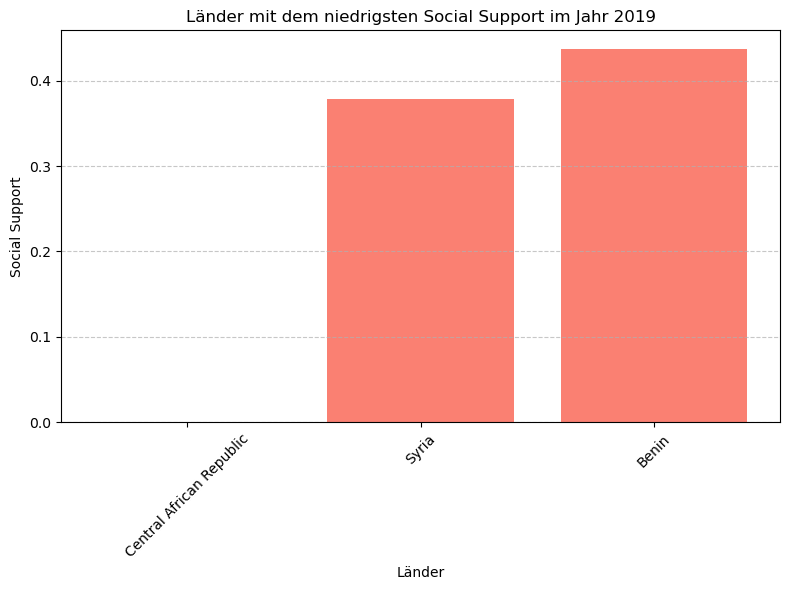

In [ ]:
# Daten für die 3 Länder mit dem niedrigsten Social Support auswählen
bottom_3_social_support = data_2019.nsmallest(3, "Social support")

# Plot erstellen
plt.figure(figsize=(8, 6))
plt.bar(bottom_3_social_support["Country or region"], bottom_3_social_support["Social support"], color='salmon')
plt.xlabel('Länder')
plt.ylabel('Social Support')
plt.title('Länder mit dem niedrigsten Social Support im Jahr 2019')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

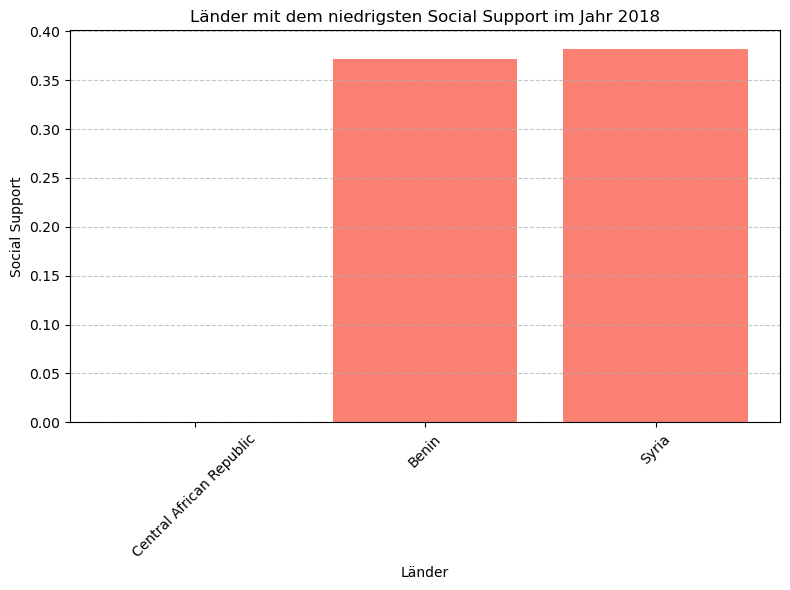

In [ ]:
# Daten für die 3 Länder mit dem niedrigsten Social Support auswählen
bottom_3_social_support = data_2018.nsmallest(3, "Social support")

# Plot erstellen
plt.figure(figsize=(8, 6))
plt.bar(bottom_3_social_support["Country or region"], bottom_3_social_support["Social support"], color='salmon')
plt.xlabel('Länder')
plt.ylabel('Social Support')
plt.title('Länder mit dem niedrigsten Social Support im Jahr 2018')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

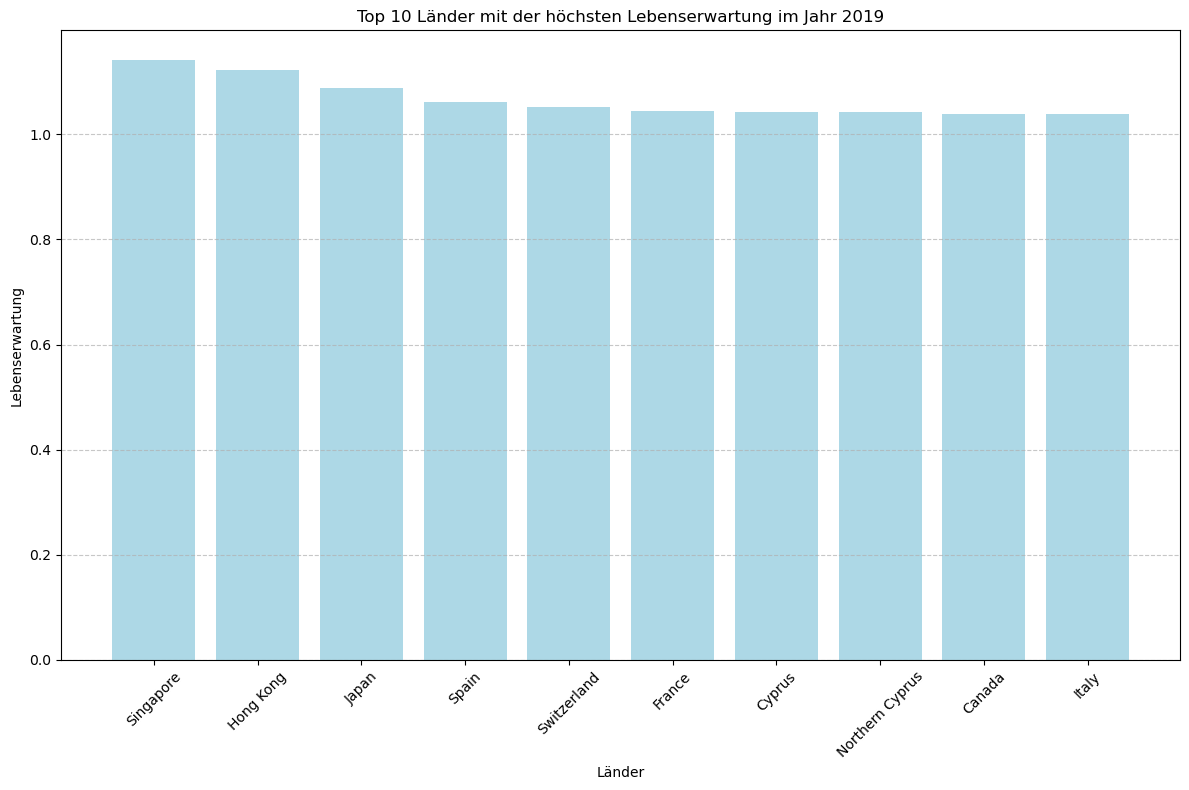

In [ ]:
# Daten für die Top 10 Länder mit der höchsten Lebenserwartung auswählen
top_10_life_expectancy = data_2019.nlargest(10, "Healthy life expectancy")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(top_10_life_expectancy["Country or region"], top_10_life_expectancy["Healthy life expectancy"], color='lightblue')
plt.xlabel('Länder')
plt.ylabel('Lebenserwartung')
plt.title('Top 10 Länder mit der höchsten Lebenserwartung im Jahr 2019')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

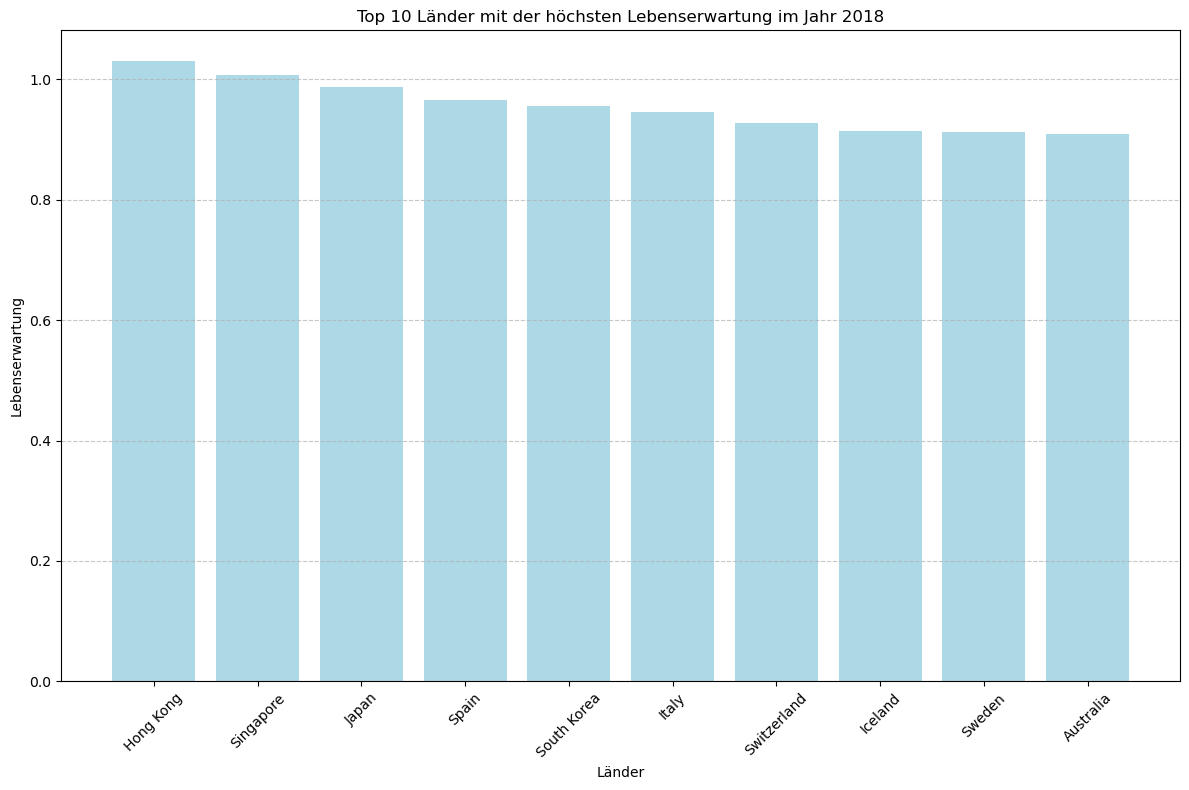

In [ ]:
# Daten für die Top 10 Länder mit der höchsten Lebenserwartung auswählen
top_10_life_expectancy = data_2018.nlargest(10, "Healthy life expectancy")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(top_10_life_expectancy["Country or region"], top_10_life_expectancy["Healthy life expectancy"], color='lightblue')
plt.xlabel('Länder')
plt.ylabel('Lebenserwartung')
plt.title('Top 10 Länder mit der höchsten Lebenserwartung im Jahr 2018')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

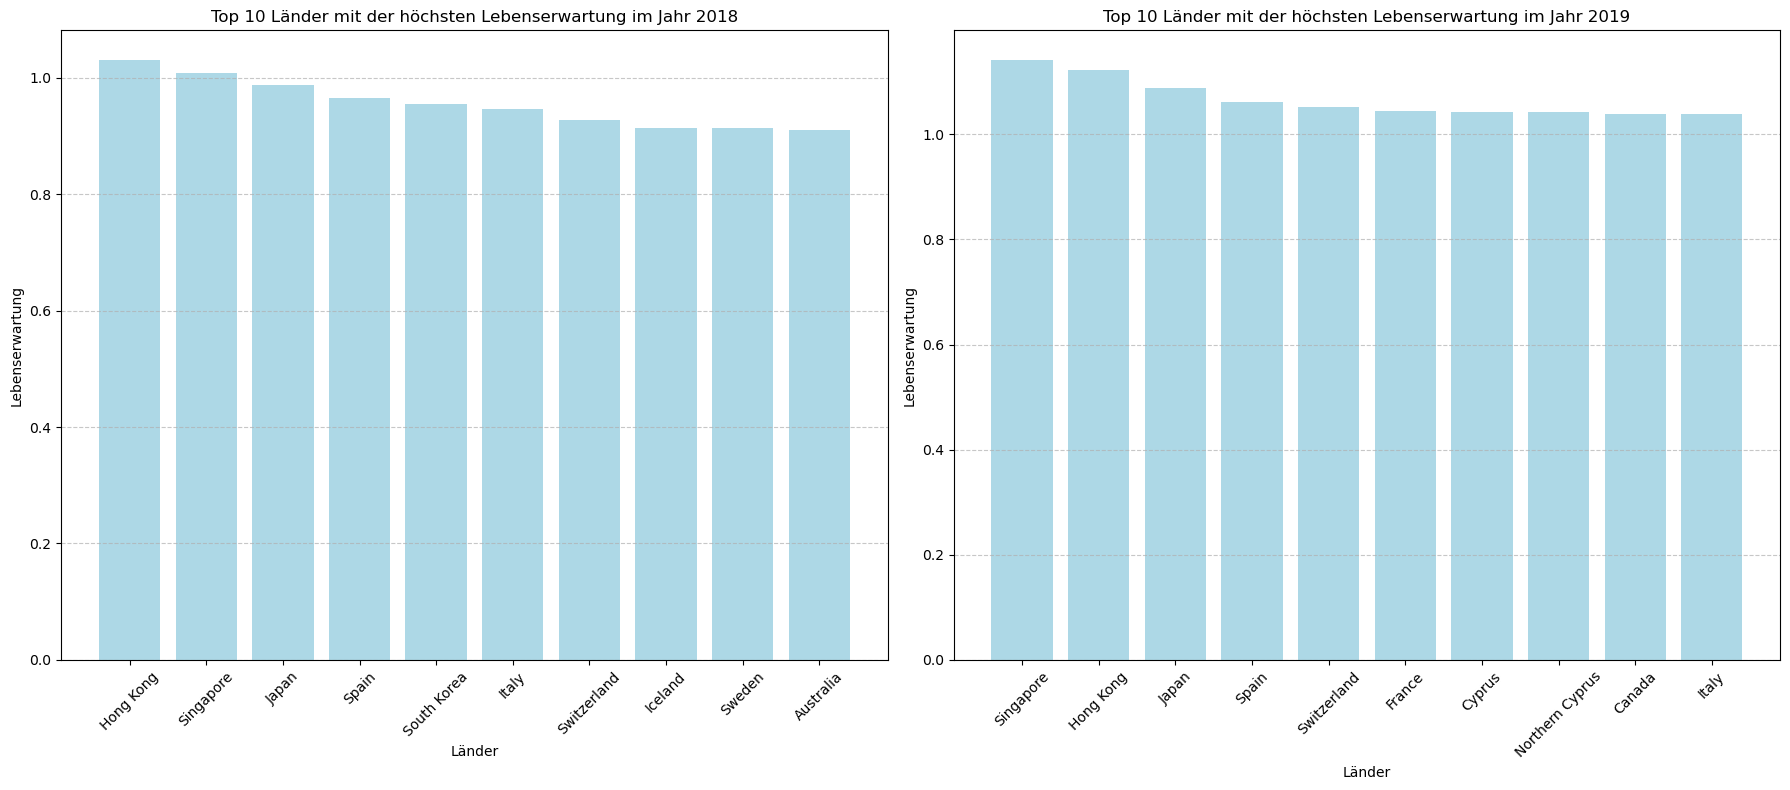

In [ ]:
# Daten für die Top 10 Länder mit der höchsten Lebenserwartung im Jahr 2018 und 2019 auswählen
top_10_life_expectancy_2018 = data_2018.nlargest(10, "Healthy life expectancy")
top_10_life_expectancy_2019 = data_2019.nlargest(10, "Healthy life expectancy")

# Erstellen der Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot für 2018 erstellen
axes[0].bar(top_10_life_expectancy_2018["Country or region"], top_10_life_expectancy_2018["Healthy life expectancy"], color='lightblue')
axes[0].set_xlabel('Länder')
axes[0].set_ylabel('Lebenserwartung')
axes[0].set_title('Top 10 Länder mit der höchsten Lebenserwartung im Jahr 2018')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot für 2019 erstellen
axes[1].bar(top_10_life_expectancy_2019["Country or region"], top_10_life_expectancy_2019["Healthy life expectancy"], color='lightblue')
axes[1].set_xlabel('Länder')
axes[1].set_ylabel('Lebenserwartung')
axes[1].set_title('Top 10 Länder mit der höchsten Lebenserwartung im Jahr 2019')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

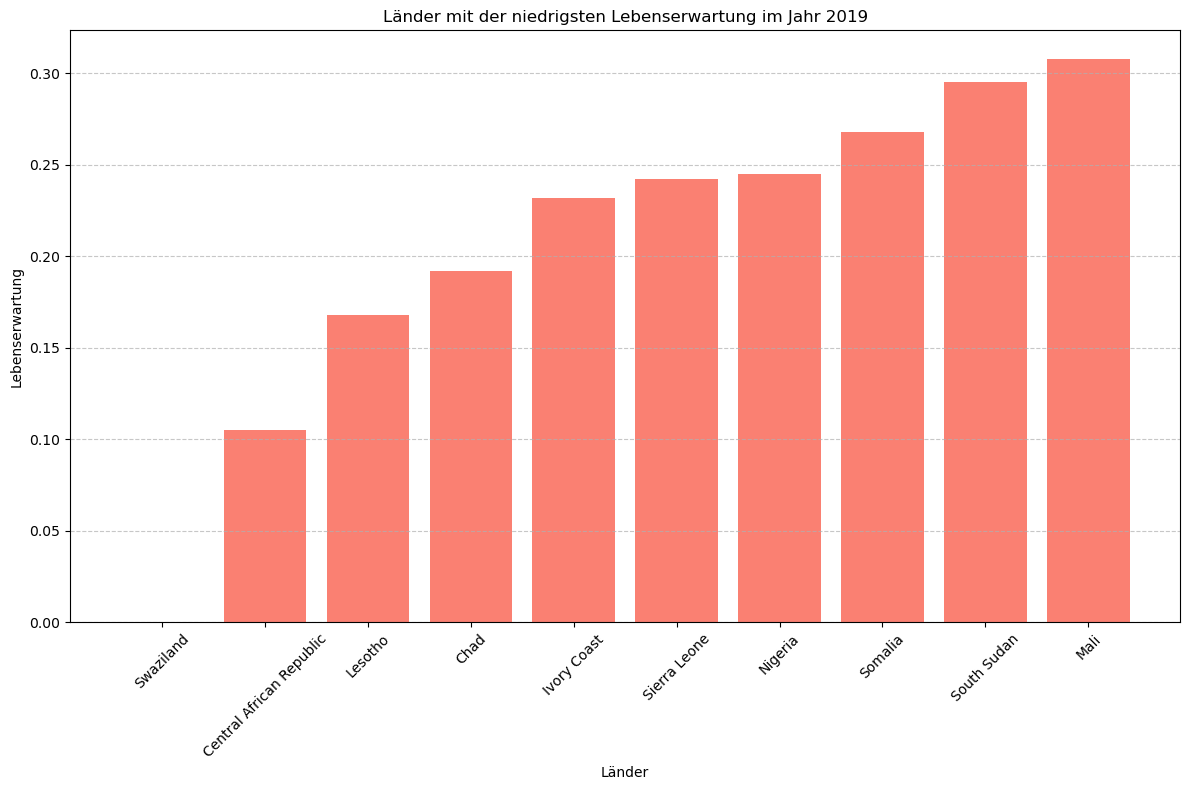

In [ ]:
# Daten für die 10 Länder mit der niedrigsten Lebenserwartung auswählen
bottom_10_life_expectancy = data_2019.nsmallest(10, "Healthy life expectancy")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(bottom_10_life_expectancy["Country or region"], bottom_10_life_expectancy["Healthy life expectancy"], color='salmon')
plt.xlabel('Länder')
plt.ylabel('Lebenserwartung')
plt.title('Länder mit der niedrigsten Lebenserwartung im Jahr 2019')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

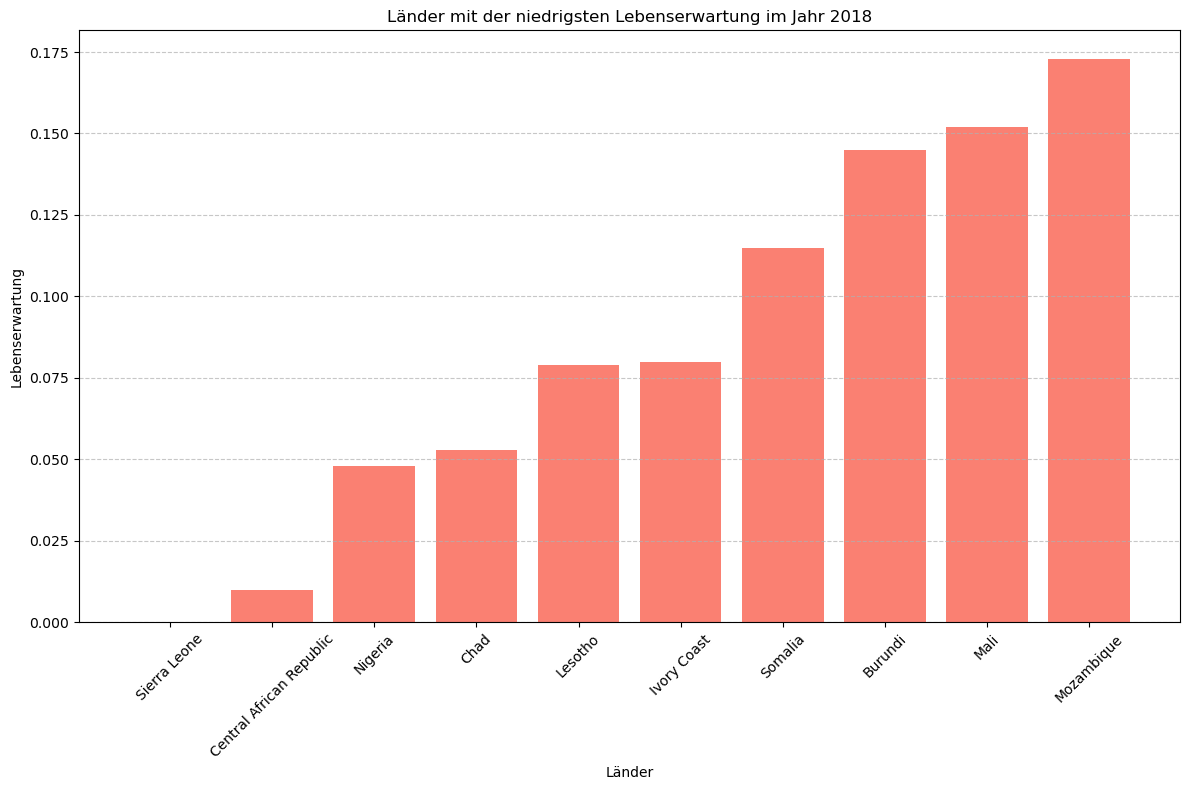

In [ ]:
# Daten für die 10 Länder mit der niedrigsten Lebenserwartung auswählen
bottom_10_life_expectancy = data_2018.nsmallest(10, "Healthy life expectancy")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(bottom_10_life_expectancy["Country or region"], bottom_10_life_expectancy["Healthy life expectancy"], color='salmon')
plt.xlabel('Länder')
plt.ylabel('Lebenserwartung')
plt.title('Länder mit der niedrigsten Lebenserwartung im Jahr 2018')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

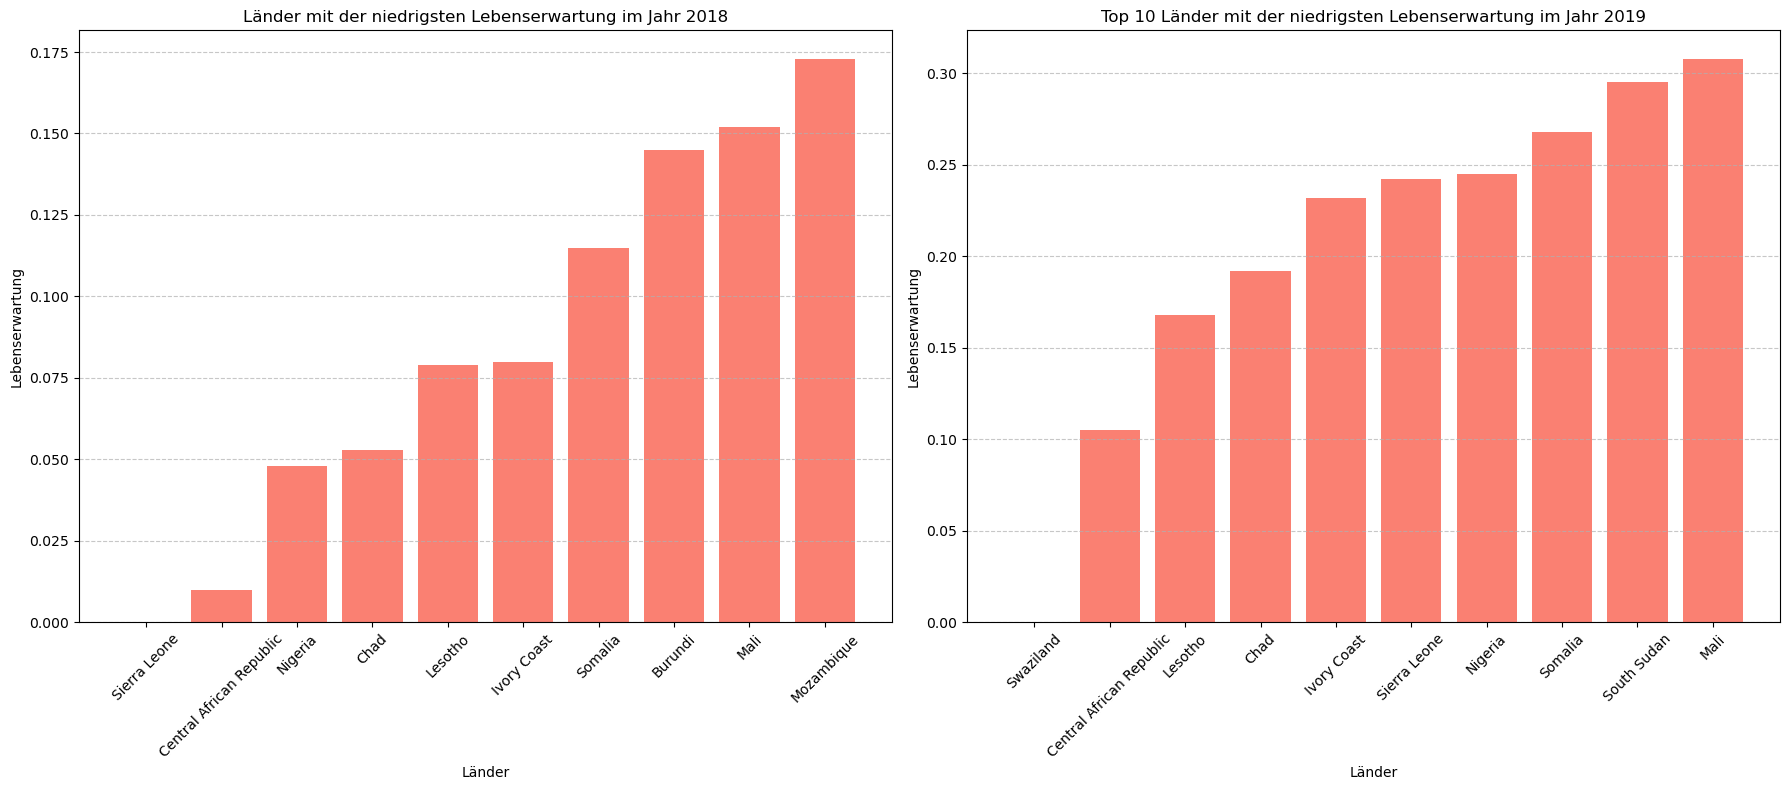

In [19]:
# Daten für die 10 Länder mit der niedrigsten Lebenserwartung im Jahr 2018 und 2019 auswählen
bottom_10_life_expectancy_2018 = data_2018.nsmallest(10, "Healthy life expectancy")
bottom_10_life_expectancy_2019 = data_2019.nsmallest(10, "Healthy life expectancy")

# Erstellen der Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot für 2018 erstellen
axes[0].bar(bottom_10_life_expectancy_2018["Country or region"], bottom_10_life_expectancy_2018["Healthy life expectancy"], color='salmon')
axes[0].set_xlabel('Länder')
axes[0].set_ylabel('Lebenserwartung')
axes[0].set_title('Länder mit der niedrigsten Lebenserwartung im Jahr 2018')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot für 2019 erstellen
axes[1].bar(bottom_10_life_expectancy_2019["Country or region"], bottom_10_life_expectancy_2019["Healthy life expectancy"], color='salmon')
axes[1].set_xlabel('Länder')
axes[1].set_ylabel('Lebenserwartung')
axes[1].set_title('Top 10 Länder mit der niedrigsten Lebenserwartung im Jahr 2019')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

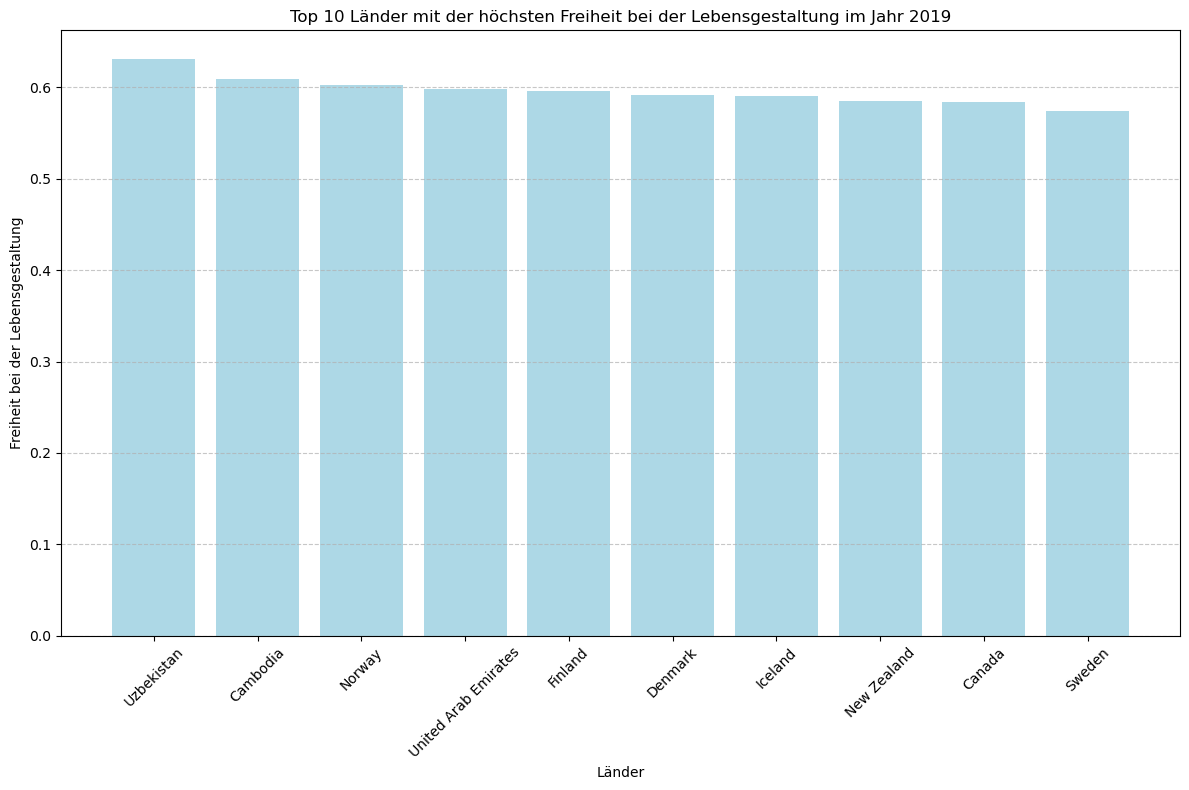

In [ ]:
# Daten für die Top 10 Länder mit der höchsten Freiheit bei der Lebensgestaltung auswählen
top_10_freedom = data_2019.nlargest(10, "Freedom to make life choices")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(top_10_freedom["Country or region"], top_10_freedom["Freedom to make life choices"], color='lightblue')
plt.xlabel('Länder')
plt.ylabel('Freiheit bei der Lebensgestaltung')
plt.title('Top 10 Länder mit der höchsten Freiheit bei der Lebensgestaltung im Jahr 2019')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

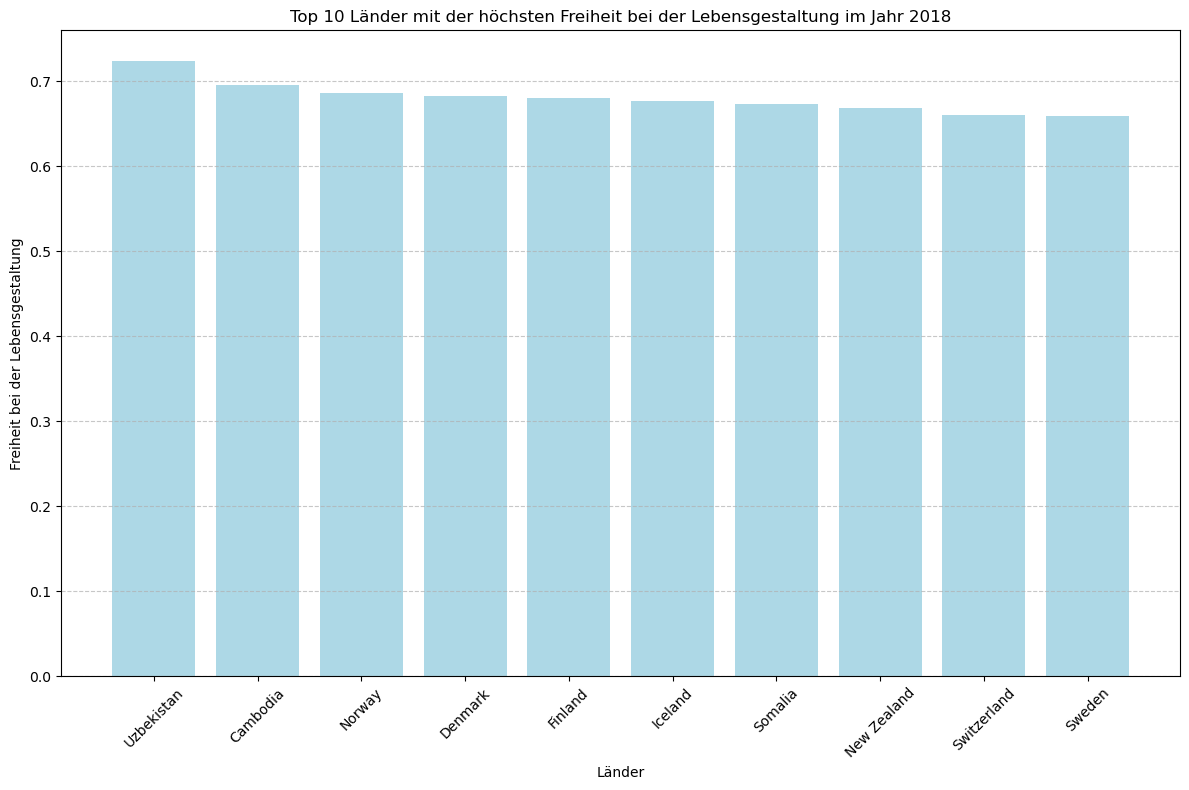

In [ ]:
# Daten für die Top 10 Länder mit der höchsten Freiheit bei der Lebensgestaltung auswählen
top_10_freedom = data_2018.nlargest(10, "Freedom to make life choices")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(top_10_freedom["Country or region"], top_10_freedom["Freedom to make life choices"], color='lightblue')
plt.xlabel('Länder')
plt.ylabel('Freiheit bei der Lebensgestaltung')
plt.title('Top 10 Länder mit der höchsten Freiheit bei der Lebensgestaltung im Jahr 2018')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

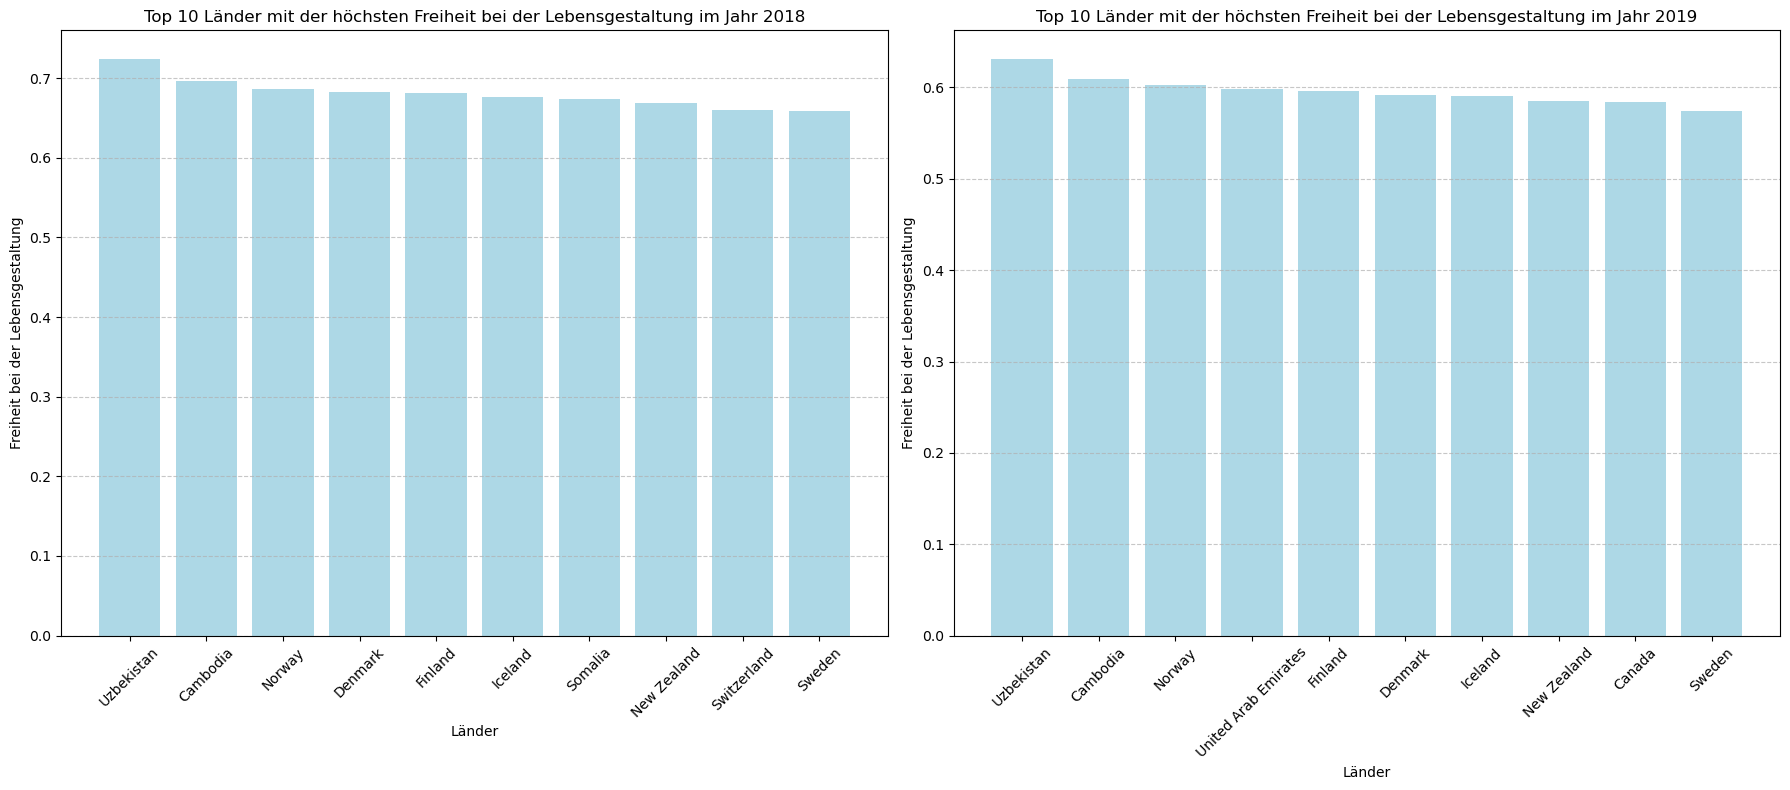

In [ ]:
# Daten für die Top 10 Länder mit der höchsten Freiheit bei der Lebensgestaltung im Jahr 2018 und 2019 auswählen
top_10_freedom_2018 = data_2018.nlargest(10, "Freedom to make life choices")
top_10_freedom_2019 = data_2019.nlargest(10, "Freedom to make life choices")

# Erstellen der Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot für 2018 erstellen
axes[0].bar(top_10_freedom_2018["Country or region"], top_10_freedom_2018["Freedom to make life choices"], color='lightblue')
axes[0].set_xlabel('Länder')
axes[0].set_ylabel('Freiheit bei der Lebensgestaltung')
axes[0].set_title('Top 10 Länder mit der höchsten Freiheit bei der Lebensgestaltung im Jahr 2018')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot für 2019 erstellen
axes[1].bar(top_10_freedom_2019["Country or region"], top_10_freedom_2019["Freedom to make life choices"], color='lightblue')
axes[1].set_xlabel('Länder')
axes[1].set_ylabel('Freiheit bei der Lebensgestaltung')
axes[1].set_title('Top 10 Länder mit der höchsten Freiheit bei der Lebensgestaltung im Jahr 2019')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

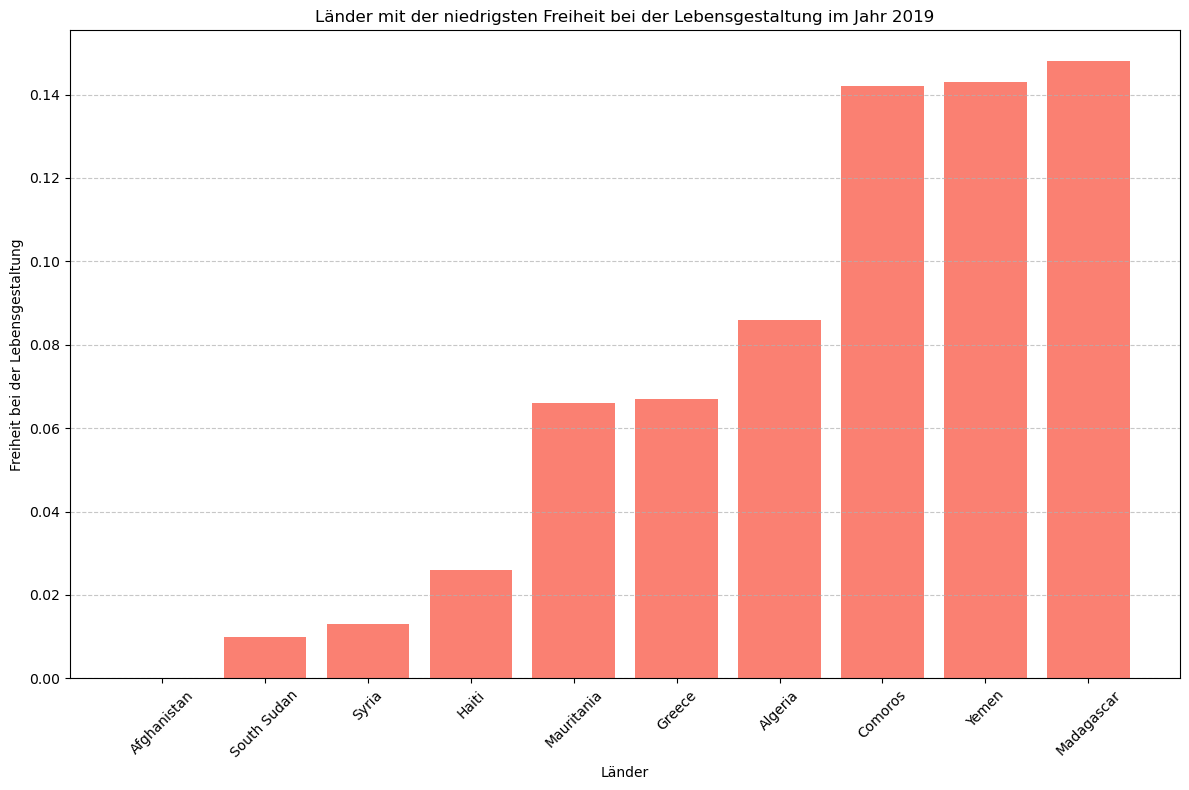

In [ ]:
# Daten für die 10 Länder mit der niedrigsten Freiheit bei der Lebensgestaltung auswählen
bottom_10_freedom = data_2019.nsmallest(10, "Freedom to make life choices")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(bottom_10_freedom["Country or region"], bottom_10_freedom["Freedom to make life choices"], color='salmon')
plt.xlabel('Länder')
plt.ylabel('Freiheit bei der Lebensgestaltung')
plt.title('Länder mit der niedrigsten Freiheit bei der Lebensgestaltung im Jahr 2019')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

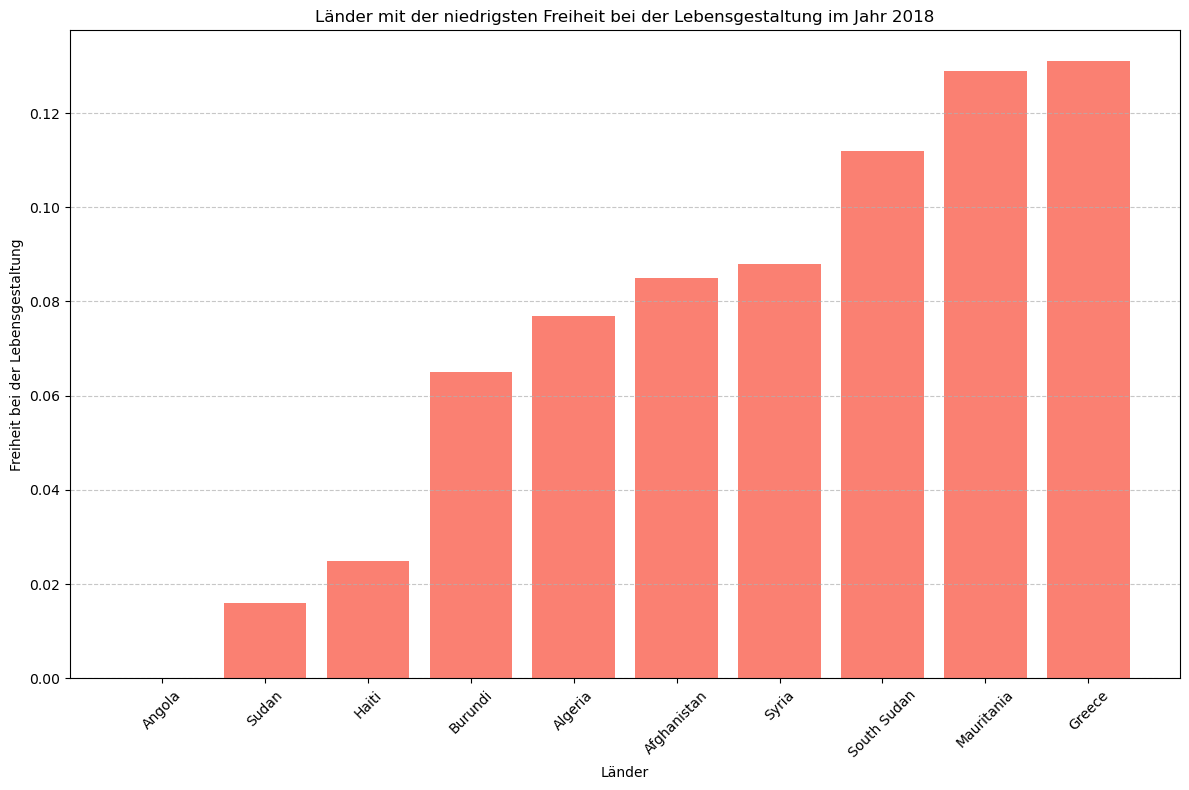

In [ ]:
# Daten für die 10 Länder mit der niedrigsten Freiheit bei der Lebensgestaltung auswählen
bottom_10_freedom = data_2018.nsmallest(10, "Freedom to make life choices")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(bottom_10_freedom["Country or region"], bottom_10_freedom["Freedom to make life choices"], color='salmon')
plt.xlabel('Länder')
plt.ylabel('Freiheit bei der Lebensgestaltung')
plt.title('Länder mit der niedrigsten Freiheit bei der Lebensgestaltung im Jahr 2018')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

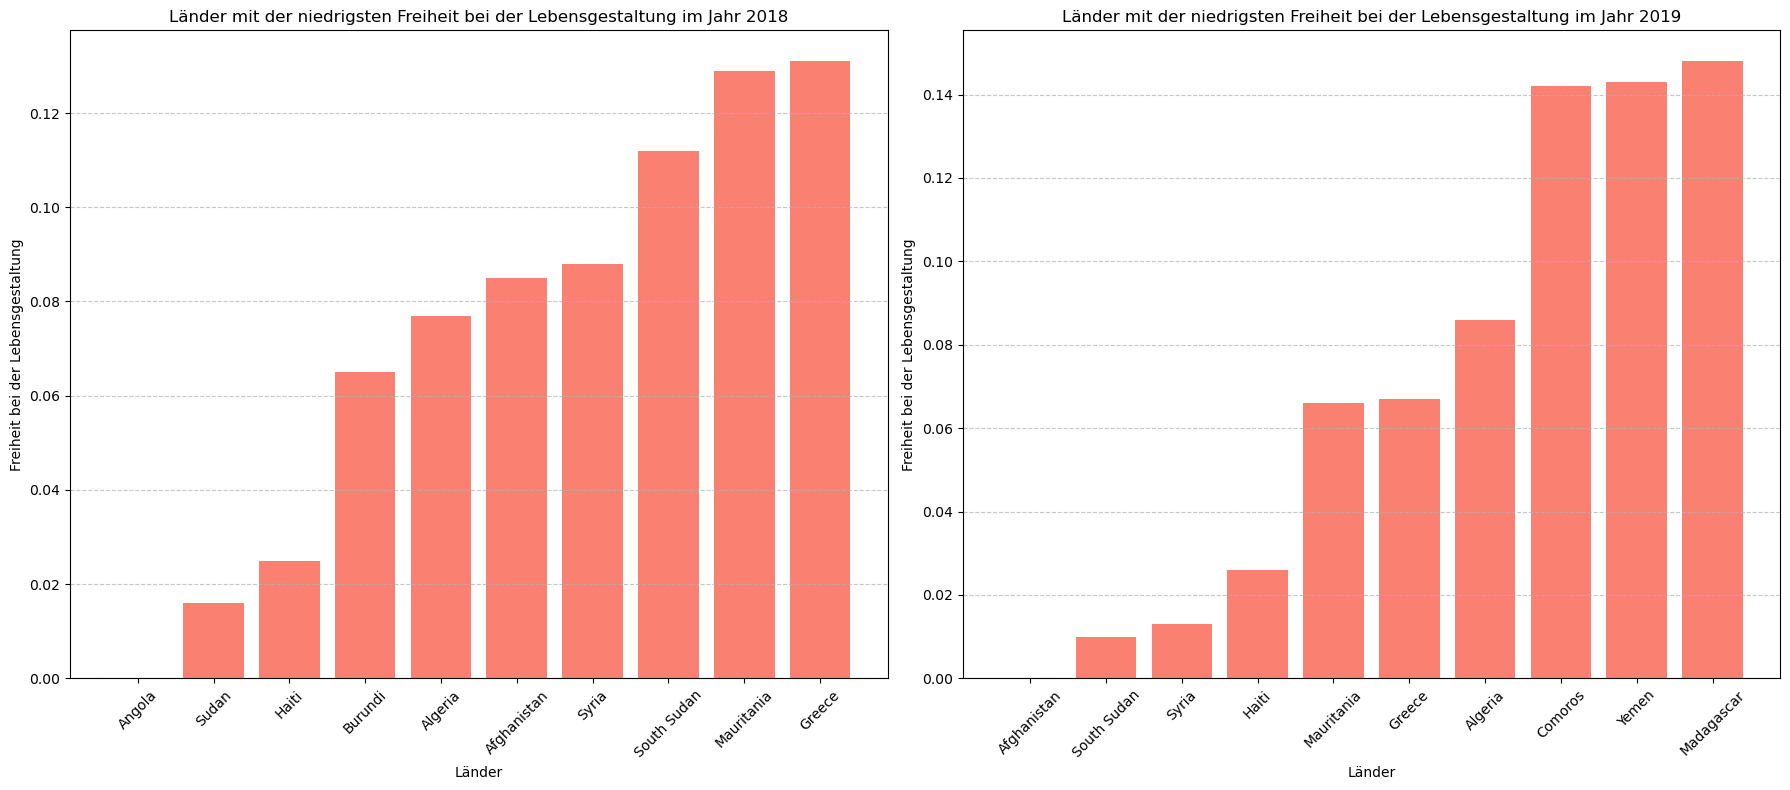

In [ ]:
# Daten für die 10 Länder mit der niedrigsten Freiheit bei der Lebensgestaltung im Jahr 2018 und 2019 auswählen
bottom_10_freedom_2018 = data_2018.nsmallest(10, "Freedom to make life choices")
bottom_10_freedom_2019 = data_2019.nsmallest(10, "Freedom to make life choices")

# Erstellen der Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot für 2018 erstellen
axes[0].bar(bottom_10_freedom_2018["Country or region"], bottom_10_freedom_2018["Freedom to make life choices"], color='salmon')
axes[0].set_xlabel('Länder')
axes[0].set_ylabel('Freiheit bei der Lebensgestaltung')
axes[0].set_title('Länder mit der niedrigsten Freiheit bei der Lebensgestaltung im Jahr 2018')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot für 2019 erstellen
axes[1].bar(bottom_10_freedom_2019["Country or region"], bottom_10_freedom_2019["Freedom to make life choices"], color='salmon')
axes[1].set_xlabel('Länder')
axes[1].set_ylabel('Freiheit bei der Lebensgestaltung')
axes[1].set_title('Länder mit der niedrigsten Freiheit bei der Lebensgestaltung im Jahr 2019')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

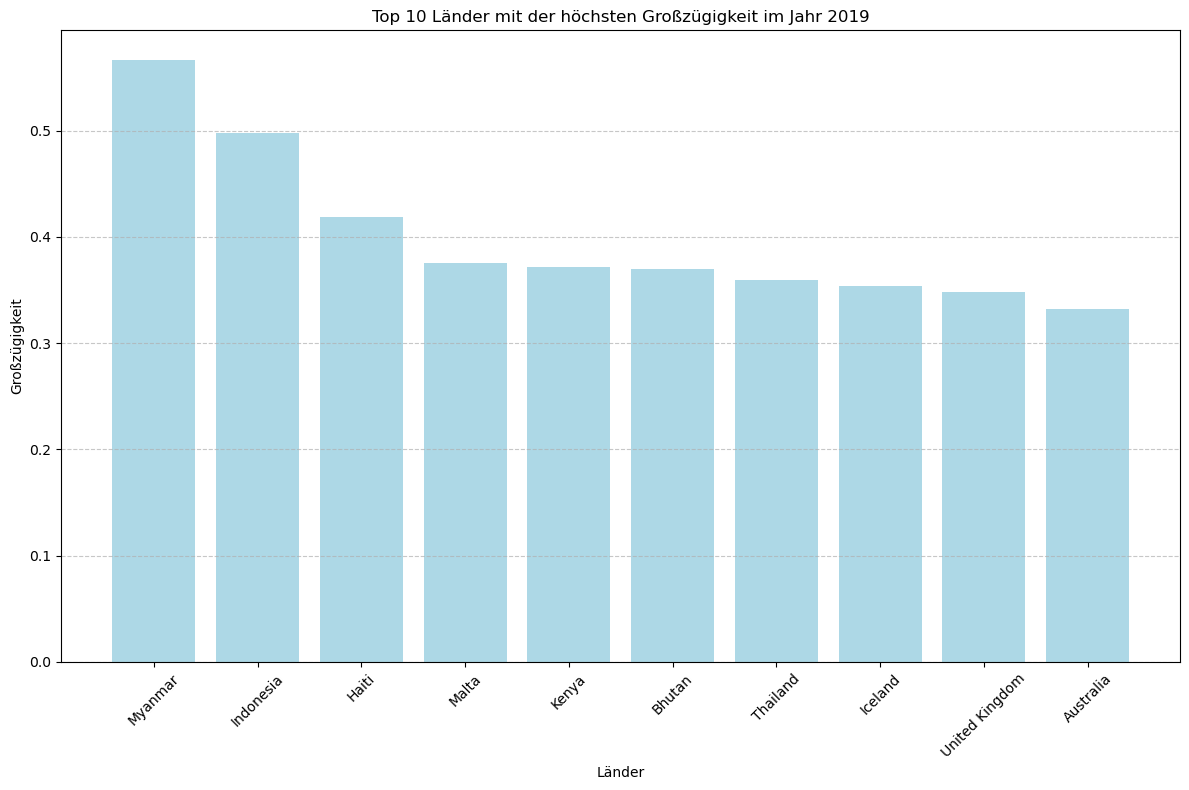

In [ ]:
# Daten für die Top 10 Länder mit der höchsten Großzügigkeit auswählen
top_10_generosity = data_2019.nlargest(10, "Generosity")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(top_10_generosity["Country or region"], top_10_generosity["Generosity"], color='lightblue')
plt.xlabel('Länder')
plt.ylabel('Großzügigkeit')
plt.title('Top 10 Länder mit der höchsten Großzügigkeit im Jahr 2019')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

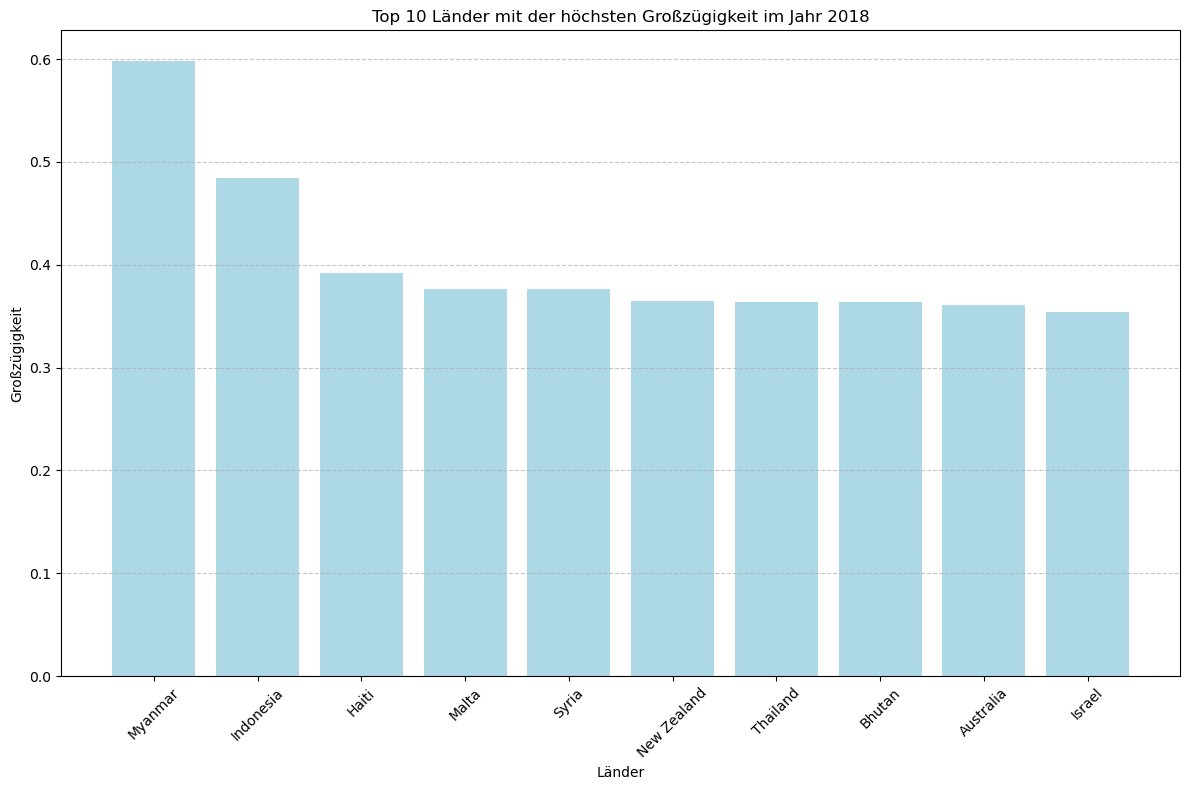

In [ ]:
# Daten für die Top 10 Länder mit der höchsten Großzügigkeit auswählen
top_10_generosity = data_2018.nlargest(10, "Generosity")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(top_10_generosity["Country or region"], top_10_generosity["Generosity"], color='lightblue')
plt.xlabel('Länder')
plt.ylabel('Großzügigkeit')
plt.title('Top 10 Länder mit der höchsten Großzügigkeit im Jahr 2018')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

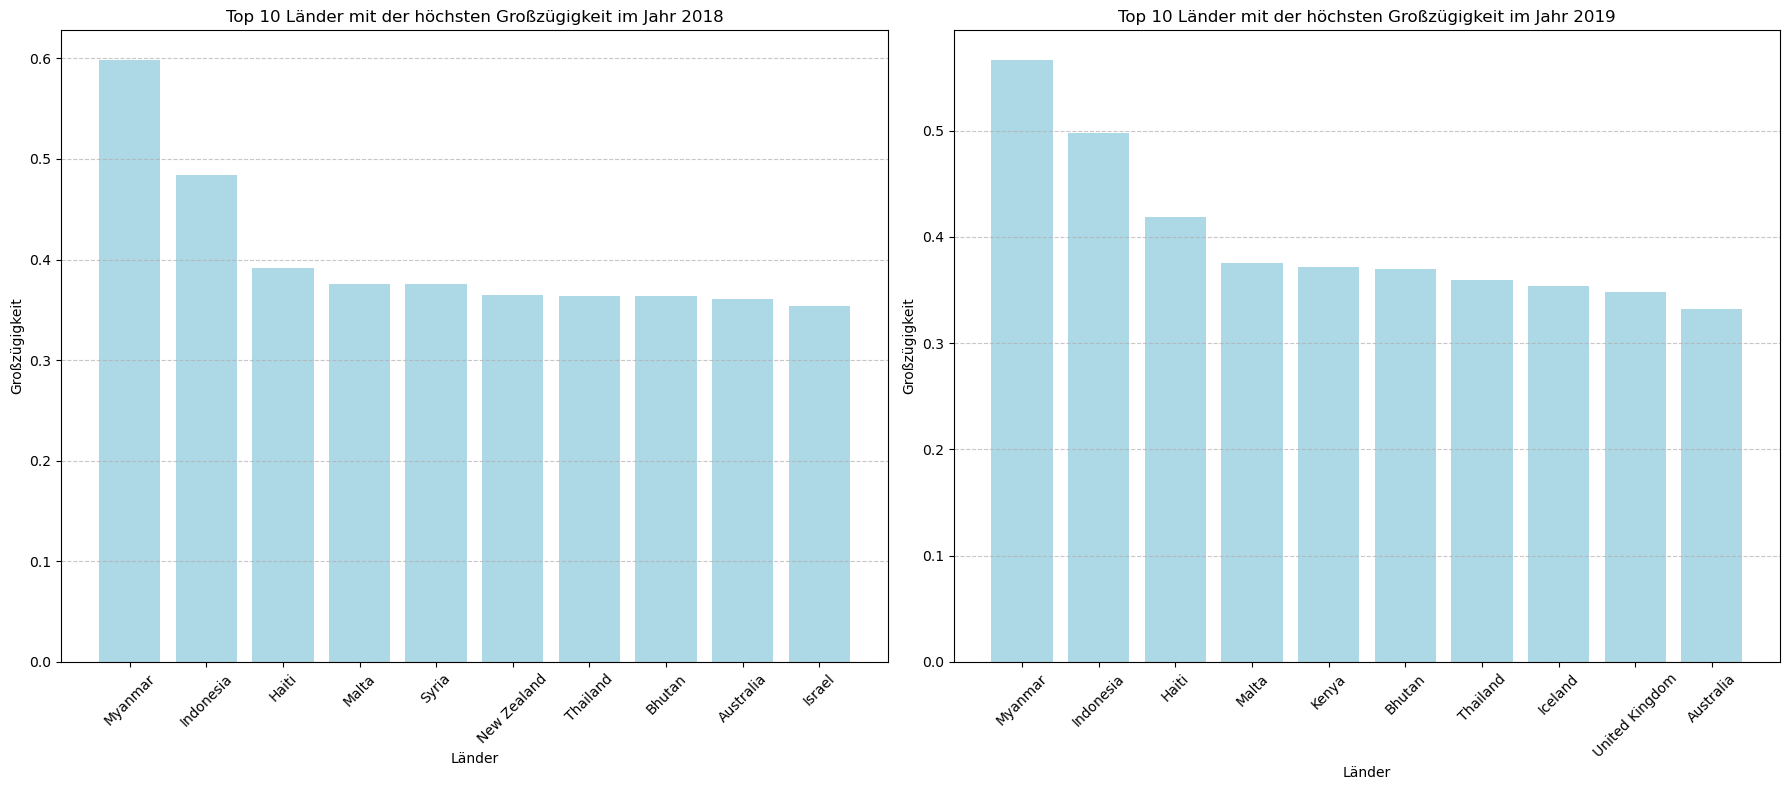

In [ ]:
# Daten für die Top 10 Länder mit der höchsten Großzügigkeit im Jahr 2018 und 2019 auswählen
top_10_generosity_2018 = data_2018.nlargest(10, "Generosity")
top_10_generosity_2019 = data_2019.nlargest(10, "Generosity")

# Erstellen der Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot für 2018 erstellen
axes[0].bar(top_10_generosity_2018["Country or region"], top_10_generosity_2018["Generosity"], color='lightblue')
axes[0].set_xlabel('Länder')
axes[0].set_ylabel('Großzügigkeit')
axes[0].set_title('Top 10 Länder mit der höchsten Großzügigkeit im Jahr 2018')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot für 2019 erstellen
axes[1].bar(top_10_generosity_2019["Country or region"], top_10_generosity_2019["Generosity"], color='lightblue')
axes[1].set_xlabel('Länder')
axes[1].set_ylabel('Großzügigkeit')
axes[1].set_title('Top 10 Länder mit der höchsten Großzügigkeit im Jahr 2019')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

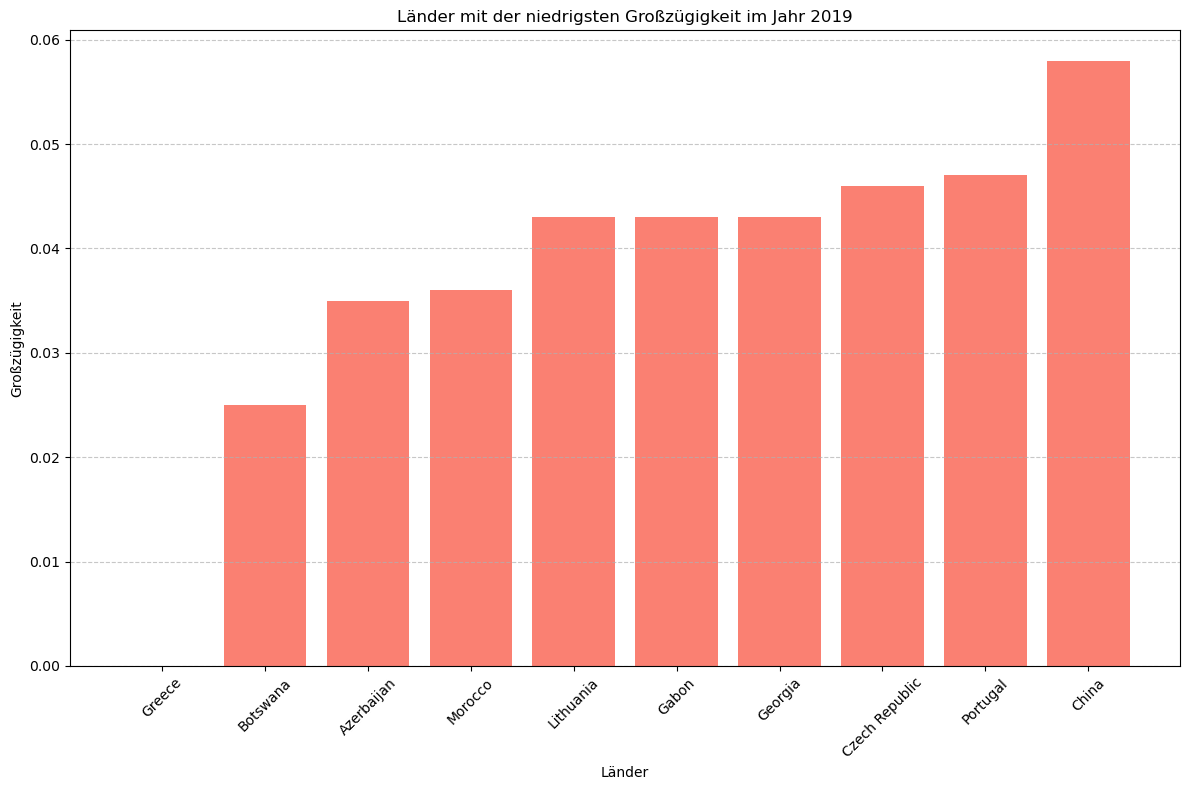

In [ ]:
# Daten für die 10 Länder mit der niedrigsten Großzügigkeit auswählen
bottom_10_generosity = data_2019.nsmallest(10, "Generosity")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(bottom_10_generosity["Country or region"], bottom_10_generosity["Generosity"], color='salmon')
plt.xlabel('Länder')
plt.ylabel('Großzügigkeit')
plt.title('Länder mit der niedrigsten Großzügigkeit im Jahr 2019')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

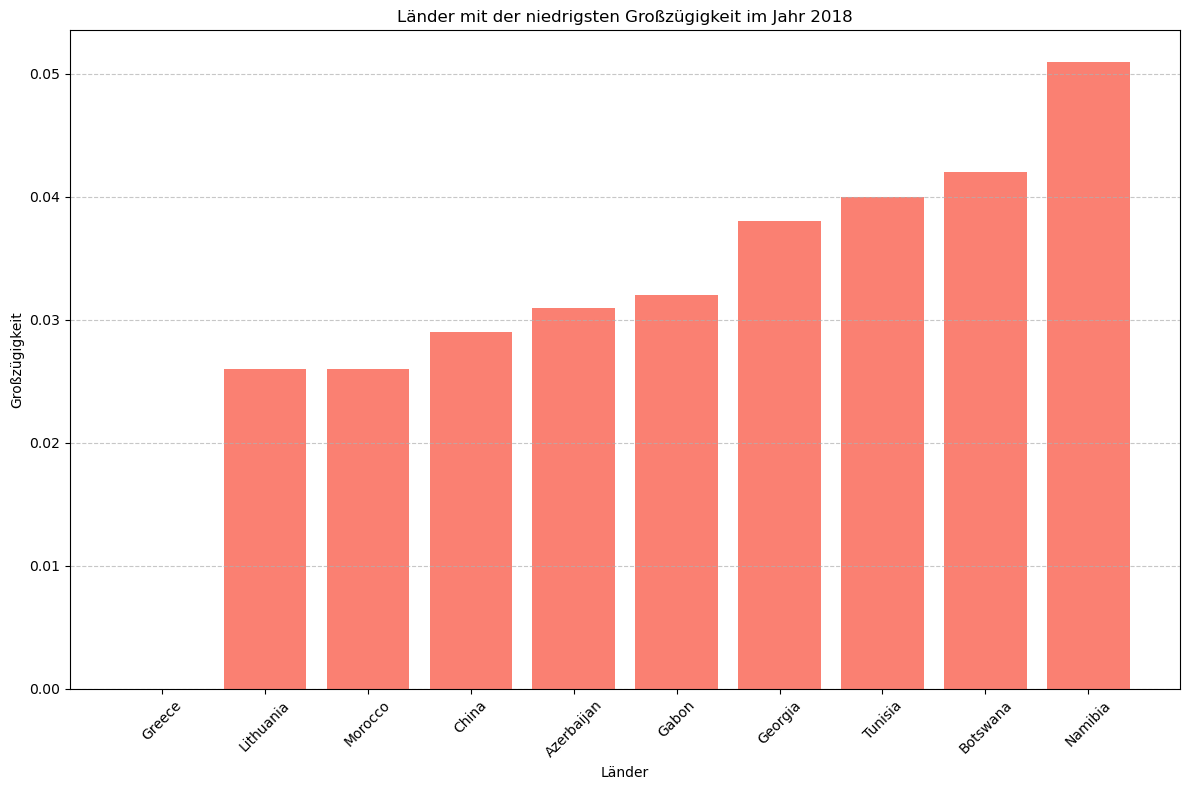

In [ ]:
# Daten für die 10 Länder mit der niedrigsten Großzügigkeit auswählen
bottom_10_generosity = data_2018.nsmallest(10, "Generosity")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(bottom_10_generosity["Country or region"], bottom_10_generosity["Generosity"], color='salmon')
plt.xlabel('Länder')
plt.ylabel('Großzügigkeit')
plt.title('Länder mit der niedrigsten Großzügigkeit im Jahr 2018')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

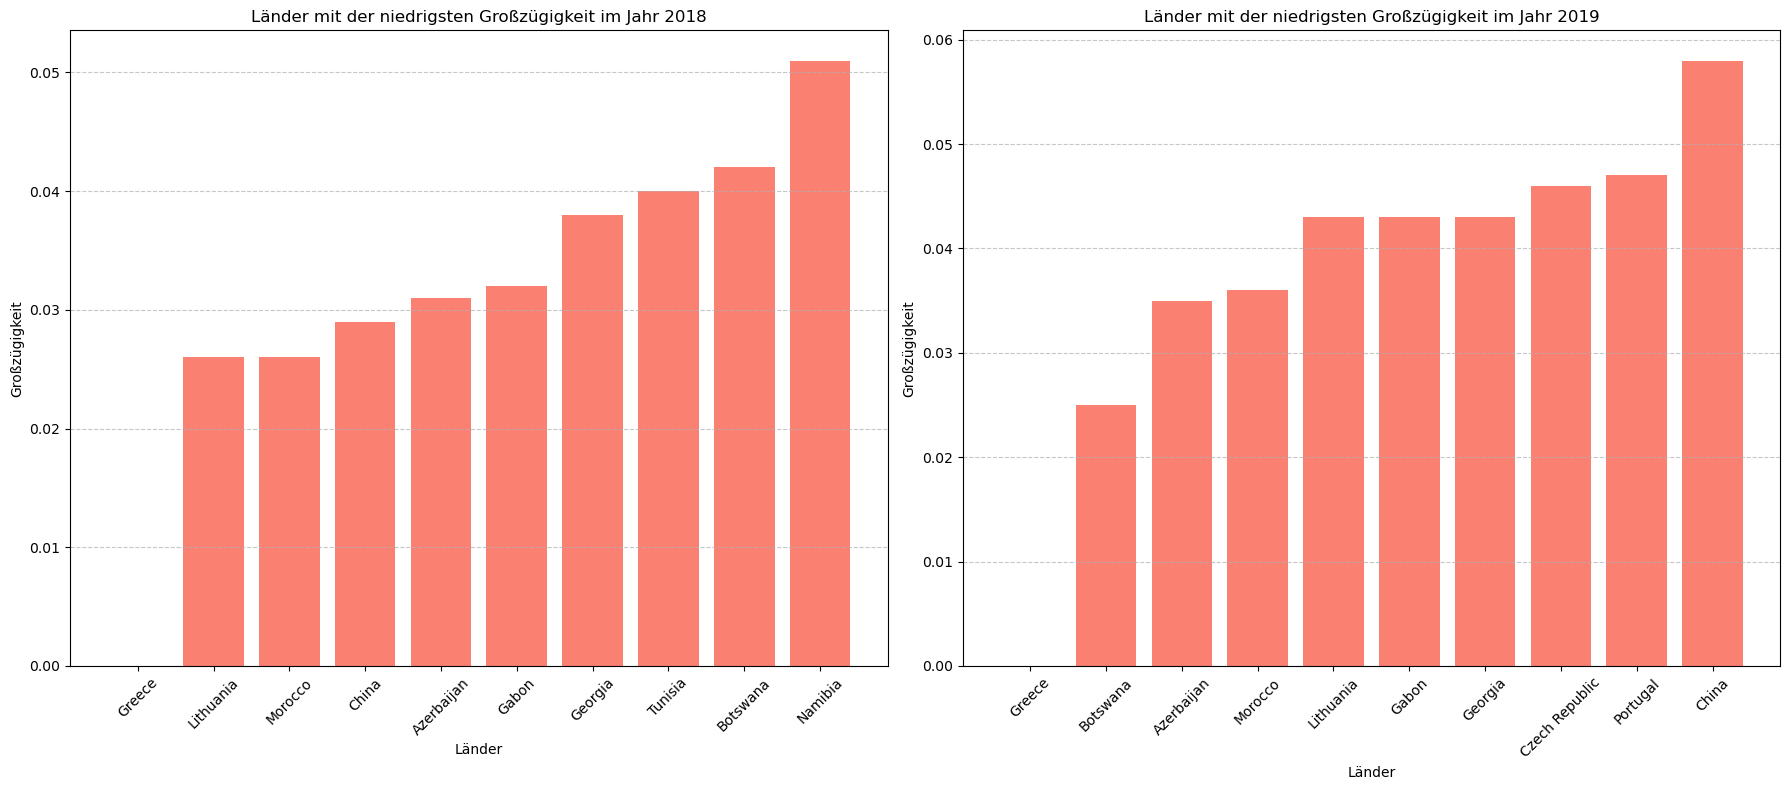

In [ ]:
# Daten für die 10 Länder mit der niedrigsten Großzügigkeit im Jahr 2018 und 2019 auswählen
bottom_10_generosity_2018 = data_2018.nsmallest(10, "Generosity")
bottom_10_generosity_2019 = data_2019.nsmallest(10, "Generosity")

# Erstellen der Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot für 2018 erstellen
axes[0].bar(bottom_10_generosity_2018["Country or region"], bottom_10_generosity_2018["Generosity"], color='salmon')
axes[0].set_xlabel('Länder')
axes[0].set_ylabel('Großzügigkeit')
axes[0].set_title('Länder mit der niedrigsten Großzügigkeit im Jahr 2018')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot für 2019 erstellen
axes[1].bar(bottom_10_generosity_2019["Country or region"], bottom_10_generosity_2019["Generosity"], color='salmon')
axes[1].set_xlabel('Länder')
axes[1].set_ylabel('Großzügigkeit')
axes[1].set_title('Länder mit der niedrigsten Großzügigkeit im Jahr 2019')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

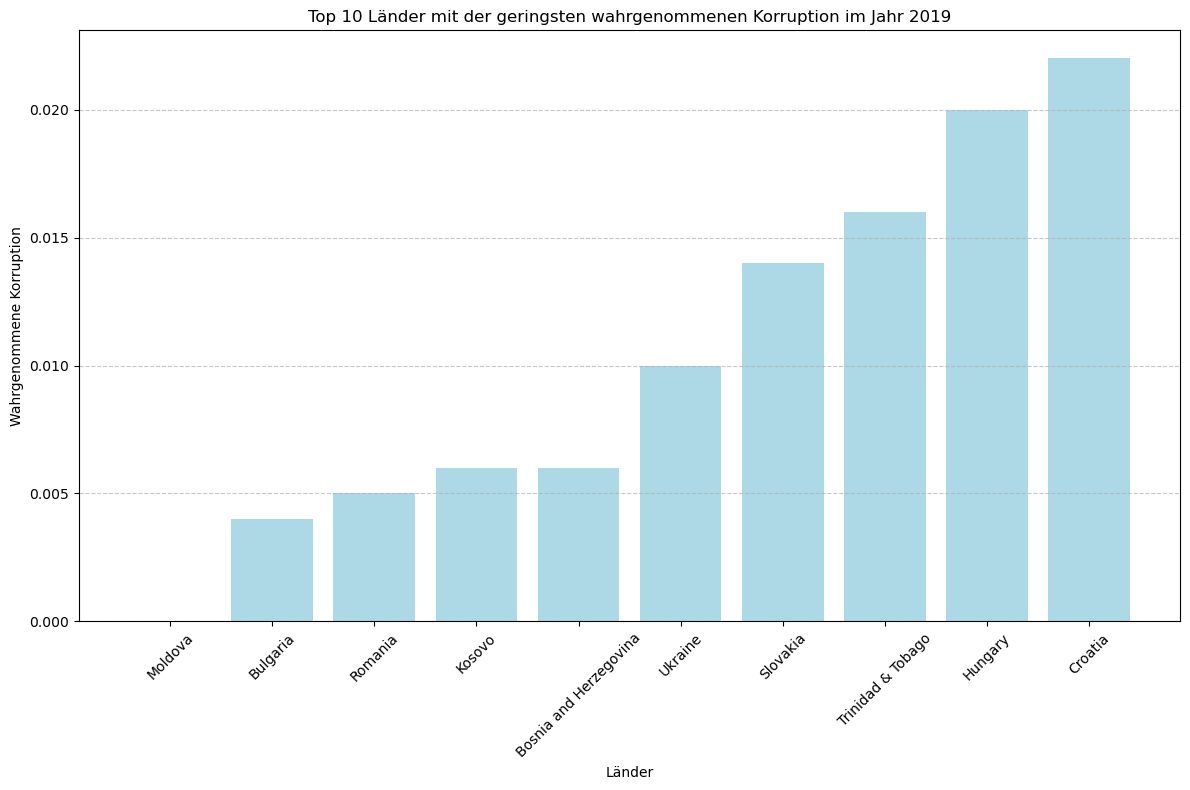

In [ ]:
# Daten für die 10 Länder mit der geringsten wahrgenommenen Korruption auswählen
top_10_corruption = data_2019.nsmallest(10, "Perceptions of corruption")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(top_10_corruption["Country or region"], top_10_corruption["Perceptions of corruption"], color='lightblue')
plt.xlabel('Länder')
plt.ylabel('Wahrgenommene Korruption')
plt.title('Top 10 Länder mit der geringsten wahrgenommenen Korruption im Jahr 2019')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

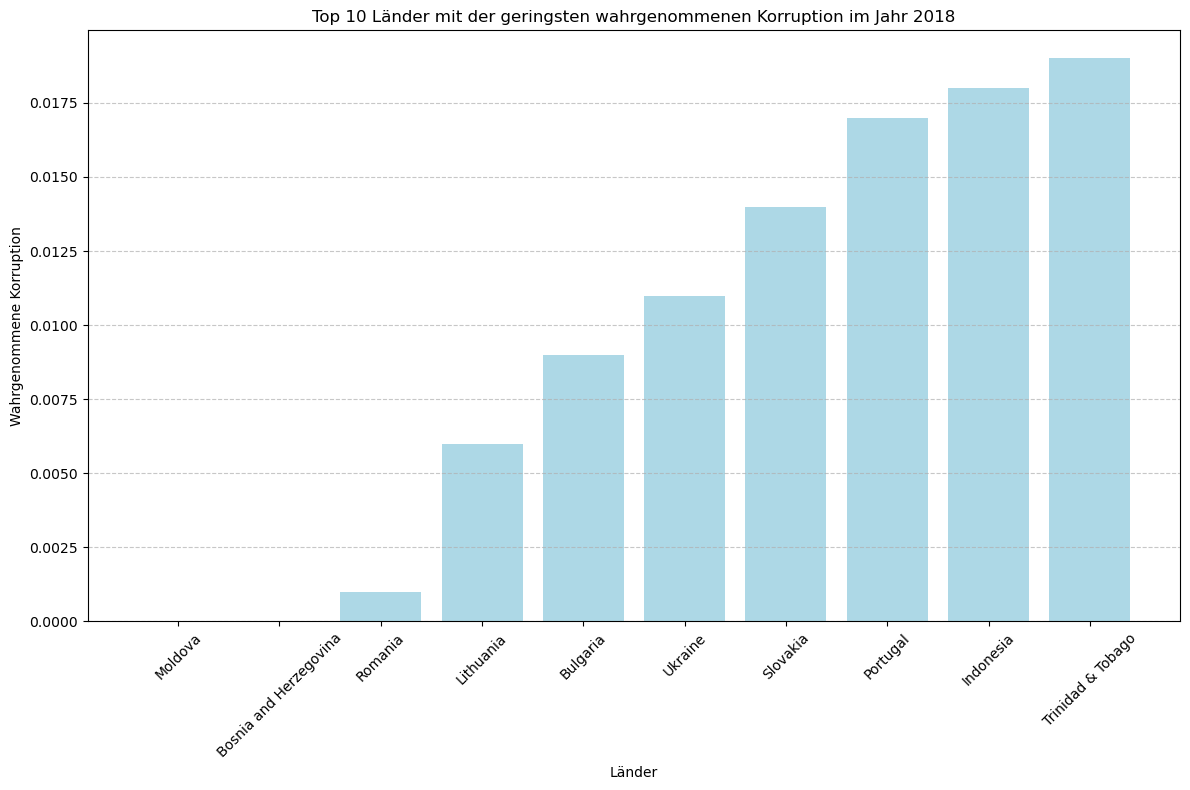

In [ ]:
# Daten für die 10 Länder mit der geringsten wahrgenommenen Korruption auswählen
top_10_corruption = data_2018.nsmallest(10, "Perceptions of corruption")

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(top_10_corruption["Country or region"], top_10_corruption["Perceptions of corruption"], color='lightblue')
plt.xlabel('Länder')
plt.ylabel('Wahrgenommene Korruption')
plt.title('Top 10 Länder mit der geringsten wahrgenommenen Korruption im Jahr 2018')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

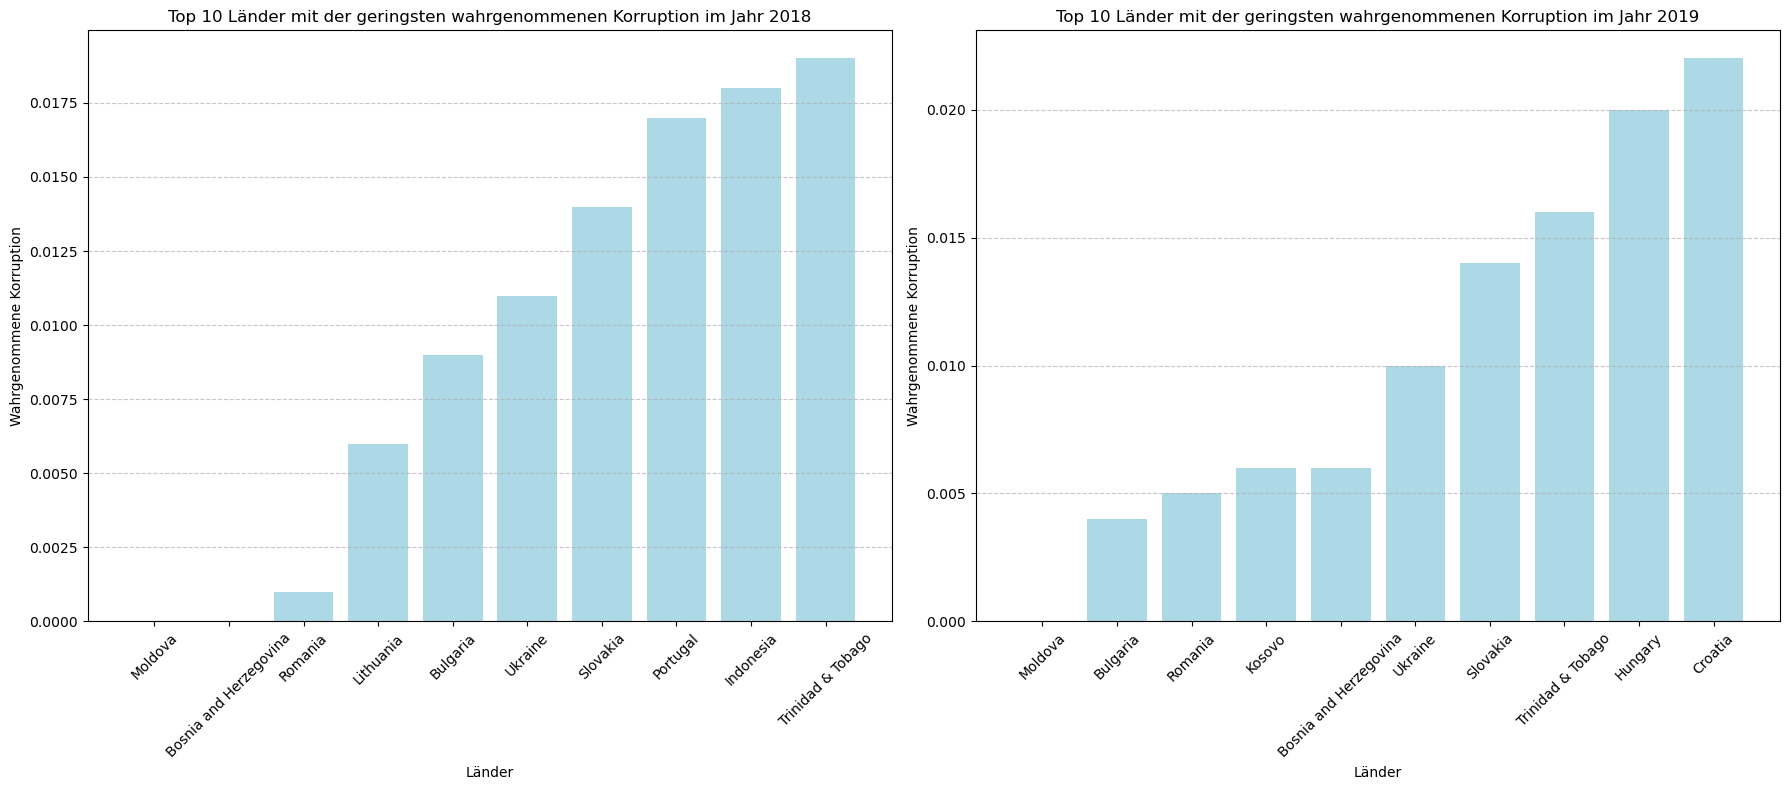

In [ ]:
# Daten für die 10 Länder mit der geringsten wahrgenommenen Korruption im Jahr 2018 und 2019 auswählen
top_10_corruption_2018 = data_2018.nsmallest(10, "Perceptions of corruption")
top_10_corruption_2019 = data_2019.nsmallest(10, "Perceptions of corruption")

# Erstellen der Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot für 2018 erstellen
axes[0].bar(top_10_corruption_2018["Country or region"], top_10_corruption_2018["Perceptions of corruption"], color='lightblue')
axes[0].set_xlabel('Länder')
axes[0].set_ylabel('Wahrgenommene Korruption')
axes[0].set_title('Top 10 Länder mit der geringsten wahrgenommenen Korruption im Jahr 2018')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot für 2019 erstellen
axes[1].bar(top_10_corruption_2019["Country or region"], top_10_corruption_2019["Perceptions of corruption"], color='lightblue')
axes[1].set_xlabel('Länder')
axes[1].set_ylabel('Wahrgenommene Korruption')
axes[1].set_title('Top 10 Länder mit der geringsten wahrgenommenen Korruption im Jahr 2019')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
#Lineplot :Bruttoinlandsprodukt (BIP) pro Land
fig = px.line(data_2018,
        x="Country or region",
        y= "GDP per capita",
        range_y=[0, data_2018["GDP per capita"].max()+0.5])
fig.add_vrect(x0="Bhutan",
              x1="Nepal",
              line_width=0,
              fillcolor="green",
              opacity=0.2)
fig.add_vrect(x0="Luxembourg",
              x1="Czech Republic",
              line_width=0,
              fillcolor="red",
              opacity=0.2)
fig.update_layout(title="Bruttoinlandsprodukt (BIP) pro Land",
                  title_x = 0.5,
                  xaxis_title="Land oder Region",
                  yaxis_title="Bruttoinlandsprodukt (BIP)")

In [ ]:
#Lineplot jahre 2019:Bruttoinlandsprodukt (BIP) pro Land
fig = px.line(data_2019,
        x="Country or region",
        y= "GDP per capita",
        range_y=[0, data_2018["GDP per capita"].max()])
fig.add_hrect(y0=1.5,
              y1=1.7,
              line_width=0,
              fillcolor="purple",
              opacity=0.2)
fig.add_vrect(x0="Namibia",
              x1="Cambodia",
              line_width=0,
              fillcolor="seagreen",
              opacity=0.2)
fig.update_layout(title="Bruttoinlandsprodukt (BIP) pro Land",
                  title_x = 0.5,
                  xaxis_title="Land oder Region",
                  yaxis_title="Bruttoinlandsprodukt (BIP)")


In [ ]:
print(data_2018.head())  # Erste Zeilen des Datensatzes anzeigen
print(data_2018.info())  # Informationen über den Datensatz anzeigen (Spalten, Datentypen, fehlende Werte usw.)
print(data_2018.describe())  # Deskriptive Statistiken anzeigen
print(data_2018.isnull().sum())  # Anzahl der fehlenden Werte pro Spalte anzeigen

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                

In [ ]:
# Rank-Korrelationsanalyse
numeric_data_2018 = data_2018.select_dtypes(include='number')
rank_corr = numeric_data_2018.corr(method='spearman')['Overall rank'].sort_values()
print(rank_corr)

Score                          -0.999998
GDP per capita                 -0.822634
Healthy life expectancy        -0.793387
Social support                 -0.775802
Freedom to make life choices   -0.534637
Perceptions of corruption      -0.262517
Generosity                     -0.112136
Overall rank                    1.000000
Name: Overall rank, dtype: float64


In [ ]:
import statsmodels.api as sm
# Regressionanalyse
X = data_2018[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
X = sm.add_constant(X)  # Konstante hinzufügen
y = data_2018['Score']  # Zielvariable

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     93.15
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           6.90e-48
Time:                        10:16:25   Log-Likelihood:                -116.91
No. Observations:                 156   AIC:                             247.8
Df Residuals:                     149   BIC:                             269.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

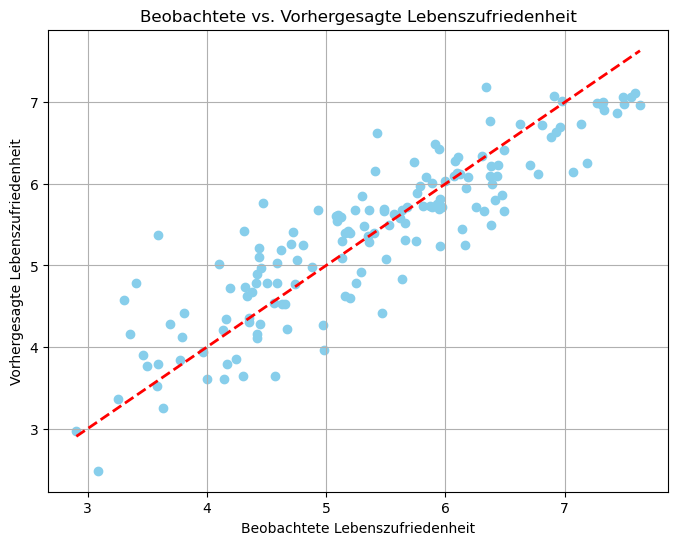

In [ ]:
# Beobachtete Werte
observed_values = y

# Vorhergesagte Werte
predicted_values = model.predict(X)

# Scatterplot der beobachteten und vorhergesagten Werte
plt.figure(figsize=(8, 6))
plt.scatter(observed_values, predicted_values, color='skyblue')
plt.plot([observed_values.min(), observed_values.max()], [observed_values.min(), observed_values.max()], linestyle='--', color='red', linewidth=2)
plt.title('Beobachtete vs. Vorhergesagte Lebenszufriedenheit')
plt.xlabel('Beobachtete Lebenszufriedenheit')
plt.ylabel('Vorhergesagte Lebenszufriedenheit')
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9204\1909116059.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


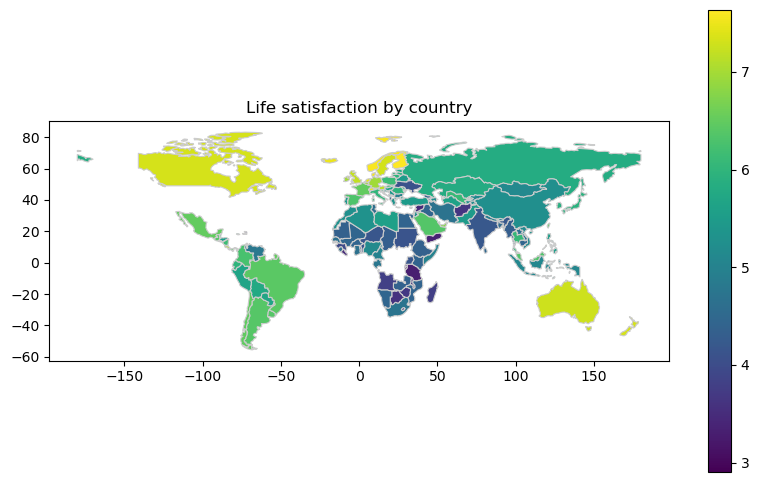

In [20]:
import geopandas as gpd

# Weltkarte laden
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Daten mit Weltkarte zusammenführen
merged_data = world.merge(data_2018, how='left', left_on='name', right_on='Country or region')

# Weltkarte mit Lebenszufriedenheit färben
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_data.plot(column='Score', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Life satisfaction by country')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Merkmale auswählen
features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Daten für die Clusteranalyse vorbereiten
X = data_2018[features]

# Clusteranalyse durchführen
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
data_2018['Cluster'] = kmeans.labels_

# Durchschnittswerte für jedes Cluster berechnen
cluster_means = data_2018.groupby('Cluster')[features].mean()

print(cluster_means)

c:\Users\User\miniconda3\envs\datacraft\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\miniconda3\envs\datacraft\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



         GDP per capita  Social support  Healthy life expectancy  \
Cluster                                                            
0              1.329467        1.453422                 0.845267   
1              0.923364        1.274652                 0.636879   
2              0.406622        0.882978                 0.291444   

         Freedom to make life choices  Generosity  Perceptions of corruption  
Cluster                                                                       
0                            0.551089    0.207689                   0.182600  
1                            0.446470    0.154848                   0.075879  
2                            0.369711    0.192689                   0.095933  


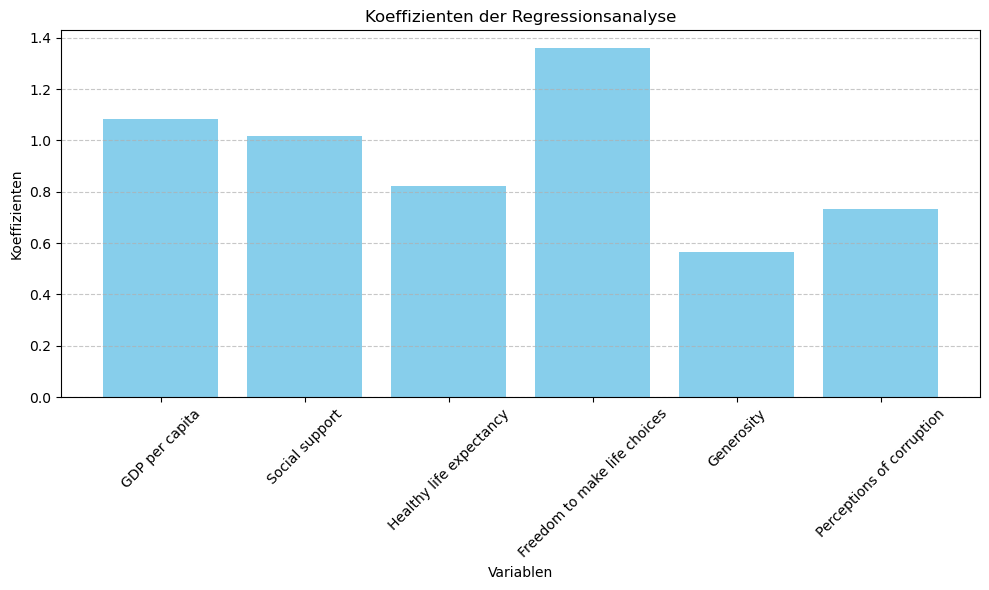

Signifikante Koeffizienten:
GDP per capita: 1.0819
Social support: 1.0173
Healthy life expectancy: 0.8209
Freedom to make life choices: 1.3611
Generosity: 0.5647
Perceptions of corruption: 0.7318


In [ ]:
import numpy as np
# Koeffizienten der Regressionsanalyse
coefficients = {
    'GDP per capita': 1.0819,
    'Social support': 1.0173,
    'Healthy life expectancy': 0.8209,
    'Freedom to make life choices': 1.3611,
    'Generosity': 0.5647,
    'Perceptions of corruption': 0.7318
}

# Plot der Koeffizienten
variables = list(coefficients.keys())
coefficients_values = list(coefficients.values())

plt.figure(figsize=(10, 6))
plt.bar(variables, coefficients_values, color='skyblue')
plt.xlabel('Variablen')
plt.ylabel('Koeffizienten')
plt.title('Koeffizienten der Regressionsanalyse')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Signifikante Koeffizienten identifizieren
significance_levels = [0.05, 0.01, 0.001]
significant_coefficients = {var: coeff for var, coeff in coefficients.items() if any(np.abs(coeff) > level for level in significance_levels)}

print("Signifikante Koeffizienten:")
for var, coeff in significant_coefficients.items():
    print(f"{var}: {coeff}")

In [ ]:
melted_data = data_2018.melt("Country or region",
                             value_vars = ["Score",
                                           "GDP per capita"
                                        ]      
                            )
melted_data.head()


,Country or region,variable,value
0,Finland,Score,7.632
1,Norway,Score,7.594
2,Denmark,Score,7.555
3,Iceland,Score,7.495
4,Switzerland,Score,7.487


In [ ]:
countries = ["Costa Rica", "Columbia", "Mexico", "Vietnam",  "Thailand" , "Guatemala", "El Salvador" , "Nicaragua",
 "Ecuador", "Dominican Republic", "Germany", "India", "Greece", "Belarus"]
# Filter melted_data based on the list
melted_data = melted_data[melted_data["Country or region"].isin(countries)]
fig = px.line(melted_data,
              x="Country or region",
              y="value",
              color="variable")
fig.update_layout(xaxis_tickangle=25,
                  title="BIP vs. Zufriedenheit",
                  xaxis_title="Land",
                  yaxis_title="Werte",
                  legend_title_text="Variable",
                  legend_bordercolor="black",  # Rahmen um die Legende
                  legend_borderwidth=1,
                  legend_bgcolor="white",
                  title_x=0.4,
                  width=800,
                  height=500,
                  margin=dict(
                      l=50,  # Linker Rand
                      r=50,  # Rechter Rand
                      b=50,  # Unten
                      t=80   # Oben
                  )
)